In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Flatten, Dense, Input, concatenate
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

from tensorflow.keras.optimizers import SGD, Adam
import matplotlib .pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from datetime import datetime
import cv2
import zipfile
import shutil
import os
import glob
import math

from tqdm import tqdm_notebook
from tensorflow.keras.applications import Xception, ResNet50
from tensorflow.keras.applications import InceptionV3, MobileNet

In [2]:
import matplotlib.font_manager as fm # 폰트연결 시켜주는 모듈
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family = font_name)

# 마이너스 사인 해결
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

# 워닝소리 미전시
import warnings
warnings.filterwarnings("ignore") 

In [3]:
df_raw = pd.read_csv("C:\\YOONJINSEOK\\Python work\\AI\\project\\smart_tomato\\01.데이터\\1.Training\\원천데이터\\TS_Timeseries\\tom1\\00_(환경제어기, 양액기)\\20210913~20210927(양액데이터).csv", encoding = "euc-kr", index_col = 0)# 1. 데이터 재탐색
df_raw

,날짜,시간,설정량1,설정량2,설정량3,잔여량1,잔여량2,잔여량3,누적량1,누적량2,...,종료,설정EC(dS),현재EC(dS),설정PH(pH),현재PH(pH),일출시간,일몰시간,현재일사(W),누적일사(J),J/Day
채널1 구역,,,,,,,,,,,,,,,,,,,,,
0,2021-9-12,23:0:0,100,100,100,0,0,0,1599,1599,...,15:36,2.8,3.5,5,4.3,6:13,18:46,0,2052,963
0,2021-9-12,23:2:0,100,100,100,0,0,0,1599,1599,...,15:36,2.8,3.4,5,4.3,6:13,18:46,0,2052,963
0,2021-9-12,23:3:58,100,100,100,0,0,0,1599,1599,...,15:36,2.8,3.5,5,4.3,6:13,18:46,0,2052,963
0,2021-9-12,23:6:2,100,100,100,0,0,0,1599,1599,...,15:36,2.8,3.5,5,4.2,6:13,18:46,0,2052,963
0,2021-9-12,23:8:0,100,100,100,0,0,0,1599,1599,...,15:36,2.8,3.5,5,4.2,6:13,18:46,0,2052,963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2021-9-27,10:45:38,90,90,90,0,0,0,399,399,...,15:13,2.8,3.4,5,5.0,6:25,18:23,309,410,1618
0,2021-9-27,10:47:37,90,90,90,0,0,0,399,399,...,15:13,2.8,3.4,5,5.0,6:25,18:23,324,414,1618
0,2021-9-27,10:49:37,90,90,90,0,0,0,399,399,...,15:13,2.8,3.4,5,4.9,6:25,18:23,307,418,1618


In [4]:
df_raw.columns

Index([' 날짜 ', ' 시간 ', ' 설정량1  ', ' 설정량2  ', ' 설정량3  ', ' 잔여량1  ', ' 잔여량2  ',
       ' 잔여량3  ', ' 누적량1  ', ' 누적량2  ', ' 누적량3  ', ' 시작 ', ' 종료 ',
       ' 설정EC(dS) ', ' 현재EC(dS) ', ' 설정PH(pH) ', ' 현재PH(pH) ', ' 일출시간 ',
       ' 일몰시간 ', ' 현재일사(W) ', ' 누적일사(J) ', ' J/Day '],
      dtype='object')

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9903 entries, 0 to 1
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0    날짜         9903 non-null   object 
 1    시간         9903 non-null   object 
 2    설정량1       9903 non-null   int64  
 3    설정량2       9903 non-null   int64  
 4    설정량3       9903 non-null   int64  
 5    잔여량1       9903 non-null   int64  
 6    잔여량2       9903 non-null   int64  
 7    잔여량3       9903 non-null   int64  
 8    누적량1       9903 non-null   int64  
 9    누적량2       9903 non-null   int64  
 10   누적량3       9903 non-null   int64  
 11   시작         9903 non-null   object 
 12   종료         9903 non-null   object 
 13   설정EC(dS)   9903 non-null   float64
 14   현재EC(dS)   9903 non-null   float64
 15   설정PH(pH)   9903 non-null   int64  
 16   현재PH(pH)   9903 non-null   float64
 17   일출시간       9903 non-null   object 
 18   일몰시간       9903 non-null   object 
 19   현재일사(W)    9903 non-null   in

In [6]:
df_raw1 = pd.read_csv("C:\\YOONJINSEOK\\Python work\\AI\\project\\smart_tomato\\01.데이터\\1.Training\\원천데이터\\TS_Timeseries\\tom1\\01_(함수율저울,열화상센서,작물환경센서)\\MV.csv", encoding = "utf-8", index_col = 0)
df_raw1.reset_index(inplace = True)

In [7]:
df_raw1.columns

Index(['time', 'EC급액', 'EC배액', 'pH급액', 'pH배액', '저울급액', '저울배액', '온도토양', '온도급액',
       '온도배액', '내부이산화탄소', '내부광량', '내부PT100온도센서1번건구', '내부PT100온도센서2번습구',
       '내부PT100온도센서3번', '내부PT100센서를이용한계산습도'],
      dtype='object')

In [8]:
df_raw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77399 entries, 0 to 77398
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               77399 non-null  object 
 1   EC급액               77399 non-null  float64
 2   EC배액               77399 non-null  float64
 3   pH급액               77399 non-null  float64
 4   pH배액               77399 non-null  float64
 5   저울급액               77399 non-null  float64
 6   저울배액               77399 non-null  float64
 7   온도토양               77399 non-null  float64
 8   온도급액               77399 non-null  float64
 9   온도배액               77399 non-null  float64
 10  내부이산화탄소            77399 non-null  int64  
 11  내부광량               77399 non-null  float64
 12  내부PT100온도센서1번건구    77399 non-null  float64
 13  내부PT100온도센서2번습구    77399 non-null  float64
 14  내부PT100온도센서3번      77399 non-null  float64
 15  내부PT100센서를이용한계산습도  77399 non-null  float64
dtypes: float64(14), int64(

In [9]:
farm5_env = pd.read_csv("tomato_farm_set/tom5_env.csv", encoding = "utf-8", index_col = 0)
#round(farm5.isnull().sum()/len(farm5)*100, 2) # 총 119개
del farm5_env["저울급액"]
del farm5_env["저울배액"]
del farm5_env["내부광량"]
farm5_env.reset_index(inplace = True)

In [10]:
farm5_env.columns = ['날짜', 'EC급액', 'EC배액', 'pH급액', 'pH배액', '온도토양', '온도급액', '온도배액',
       '내부이산화탄소', '평균온도', 'J/Day']
farm5_env = farm5_env[['날짜', 'J/Day', '평균온도', 'EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소',
       '온도토양', '온도급액', '온도배액']]

In [11]:
# farm5_env.to_csv("tomato_farm_set/tom5.csv", encoding = "utf-8")

In [12]:
farm1_outer = pd.read_csv("tomato_farm_set/tom1.csv", encoding = "utf-8", index_col = 0)
round(farm1_outer.isnull().sum()/len(farm1_outer)*100, 2) # 총 3438개

날짜           0.00
J/Day        0.00
평균온도        86.59
EC급액        86.59
EC배액        86.59
pH급액        86.59
pH배액        86.59
내부이산화탄소     86.59
온도토양       100.00
온도급액       100.00
온도배액       100.00
dtype: float64

In [13]:
farm1 = pd.read_csv("tomato_farm_set/tom1_inner.csv", encoding = "utf-8", index_col = 0)
farm1.isnull().sum() # 총 461개

날짜         0
EC급액       0
EC배액       0
pH급액       0
pH배액       0
내부이산화탄소    0
평균온도       0
J/Day      0
dtype: int64

In [14]:
farm2 = pd.read_csv("tomato_farm_set/tom2.csv", encoding = "utf-8", index_col = 0)
round(farm2.isnull().sum()/len(farm2)*100, 2) # 총 1359개

날짜           0.0
J/Day      100.0
평균온도         0.0
EC급액         0.0
EC배액         0.0
pH급액         0.0
pH배액         0.0
내부이산화탄소      0.0
온도토양         0.0
온도급액       100.0
온도배액       100.0
dtype: float64

In [15]:
farm3 = pd.read_csv("tomato_farm_set/tom3.csv", encoding = "utf-8", index_col = 0)
round(farm3.isnull().sum()/len(farm3)*100, 2) # 총 18888개 / 버린다.

날짜           0.0
J/Day       70.9
평균온도        70.9
EC급액       100.0
EC배액       100.0
pH급액       100.0
pH배액       100.0
내부이산화탄소     70.9
온도토양       100.0
온도급액       100.0
온도배액       100.0
dtype: float64

In [16]:
farm4 = pd.read_csv("tomato_farm_set/tom4.csv", encoding = "utf-8", index_col = 0)
round(farm4.isnull().sum()/len(farm4)*100, 2) # 2799개 / 버리자

날짜          0.00
J/Day       0.46
평균온도       98.43
EC급액       98.43
EC배액       98.43
pH급액       98.43
pH배액       98.43
내부이산화탄소    98.43
온도토양       98.43
온도급액       98.43
온도배액       98.43
dtype: float64

In [17]:
farm5 = pd.read_csv("tomato_farm_set/tom5.csv", encoding = "utf-8", index_col = 0)
round(farm5.isnull().sum()/len(farm5)*100, 2) # 총 119개

날짜         0.0
J/Day      0.0
평균온도       0.0
EC급액       0.0
EC배액       0.0
pH급액       0.0
pH배액       0.0
내부이산화탄소    0.0
온도토양       0.0
온도급액       0.0
온도배액       0.0
dtype: float64

In [18]:
farm6 = pd.read_csv("tomato_farm_set/tom6.csv", encoding = "utf-8", index_col = 0)
round(farm6.isnull().sum()/len(farm6)*100, 2) # 총 1370개

날짜          0.00
J/Day      15.33
평균온도       67.81
EC급액       67.81
EC배액       67.81
pH급액       67.81
pH배액       67.81
내부이산화탄소    67.81
온도토양       67.81
온도급액       67.81
온도배액       67.81
dtype: float64

In [19]:
pd.read_excel("tomato_farm_set/destroy_tomato.xlsx", 
                      sheet_name = "45주차", 
                      skiprows = 3)

,수집항목,과폭,과고,과중,당도,산도,경도,수분율
0,개체번호,cm,cm,g,Brix %,0-14,kgf,%
1,1,7.4,5.8,205,4.1,4,2.65,71.25
2,2,7.9,6.2,210,4.7,4,2.7,72.5
3,3,7.7,6,205,4.7,4,2.7,71.25
4,4,7.8,5.7,206,4.7,4.5,2.72,75
...,...,...,...,...,...,...,...,...
97,97,8,6.4,243,5.1,4,2.961964,70
98,98,8.2,6.5,260,4.8,4,2.98326,76.5
99,99,7.5,6.6,233,5.4,4,3.004556,71.25
100,100,9,6.5,360,5.1,4,3.025851,71.25


In [20]:
# 21년도 파괴데이터
dst_tom_21 = []
for i in range(45, 53):
    try:
        dst_tom_df = pd.read_excel("tomato_farm_set/destroy_tomato.xlsx", 
                      sheet_name = "{}주차".format(i), 
                      skiprows = 3)
        print("{}주차".format(i), dst_tom_df.head())
        dst_tom_df = dst_tom_df.loc[1:100]
        dst_tom_df["주차"] = "{}".format(i)
        dst_tom_21.append(dst_tom_df[["주차", "과중", "당도", "산도"]])          
        
    except Exception as e: 
        print(e)

45주차    수집항목   과폭   과고   과중      당도    산도    경도    수분율
0  개체번호   cm   cm    g  Brix %  0-14   kgf      %
1     1  7.4  5.8  205     4.1     4  2.65  71.25
2     2  7.9  6.2  210     4.7     4   2.7   72.5
3     3  7.7    6  205     4.7     4   2.7  71.25
4     4  7.8  5.7  206     4.7   4.5  2.72     75
46주차    수집항목   과폭   과고   과중      당도    산도    경도    수분율
0  개체번호   cm   cm    g  Brix %  0-14   kgf      %
1     1  8.6  6.6  276     4.2     4  2.65   76.5
2     2  9.2    7  375     4.1     4   2.7   72.5
3     3  7.6  7.1  241     4.2     4   2.7  71.25
4     4  8.4  6.7  247     3.8     4  2.72     75
47주차    수집항목   과폭   과고   과중      당도    산도    경도    수분율
0  개체번호   cm   cm    g  Brix %  0-14   kgf      %
1     1  6.6  6.9  168       4     4  2.65   76.5
2     2  7.5    7  223       4     4  2.71   72.5
3     3    7  6.5  182       4     4   2.8  71.25
4     4  6.4    7  159     3.7     4  2.72   79.5
48주차    수집항목    과폭   과고   과중      당도    산도    경도   수분율
0  개체번호    cm   cm    g  Brix 

In [21]:
# 22년도 파괴데이터
dst_tom_22 = []
for i in range(1, 7):
    try:    
        dst_tom_df = pd.read_excel("tomato_farm_set/destroy_tomato.xlsx", 
                        sheet_name = "{}주차".format(str(i).zfill(2)),
                        skiprows = 3)
        print("{}주차".format(i).zfill(2), dst_tom_df)
        dst_tom_df = dst_tom_df.loc[1:100]
        dst_tom_df["주차"] = "{}".format(str(i).zfill(2))
        dst_tom_22.append(dst_tom_df[["주차", "과중", "당도", "산도"]])
            
    except Exception as e: 
        print(e)

1주차      수집항목      과폭      과고      과중      당도    산도       경도      수분율
0    개체번호      cm      cm       g  Brix %  0-14      kgf        %
1       1     8.5     6.2     277     3.8     4     2.71     75.4
2       2     7.4     5.8     183     3.8     4     2.78       72
3       3     8.3    6.14     223     3.9     4    2.752     75.1
4       4     8.7     6.3     260     4.1   3.5     2.74     73.2
..    ...     ...     ...     ...     ...   ...      ...      ...
97     97     7.4     5.9     191     3.7     4     2.74       70
98     98     9.4       7     300     3.4     4     2.74     71.9
99     99     7.1     5.7     161     4.1     4      2.7     70.8
100   100     6.8     5.3     136     4.2     4     2.71     71.7
101   평균값  7.5624  6.0964  204.37  3.7888  4.02  2.73789  72.6165

[102 rows x 8 columns]
2주차      수집항목    과폭     과고      과중      당도     산도        경도       수분율
0    개체번호    cm     cm       g  Brix %   0-14       kgf         %
1       1   7.9    5.9     224     3.7      

In [22]:
for i in range(len(dst_tom_21)):
    print(str(i+45) + "주차", dst_tom_21[i].astype("float32").describe())
    print("----------------------------------------------------------------")
# 21년도 과중, 당도, 산도의 평균 - 중앙값의 차이는 크지 않은듯 하다

45주차           주차          과중          당도          산도
count  100.0  100.000000  100.000000  100.000000
mean    45.0  245.850006    4.488999    4.025000
std      0.0   57.880814    0.283875    0.164762
min     45.0  138.000000    4.100000    3.500000
25%     45.0  205.000000    4.300000    4.000000
50%     45.0  237.000000    4.400000    4.000000
75%     45.0  280.000000    4.700000    4.000000
max     45.0  400.000000    5.400000    4.500000
----------------------------------------------------------------
46주차           주차          과중          당도          산도
count  100.0  100.000000  100.000000  100.000000
mean    46.0  246.660004    4.373999    4.020000
std      0.0   46.536884    4.057034    0.140705
min     46.0  150.000000    3.400000    3.500000
25%     46.0  213.750000    3.900000    4.000000
50%     46.0  248.000000    4.000000    4.000000
75%     46.0  278.250000    4.025000    4.000000
max     46.0  375.000000   44.500000    4.500000
-------------------------------------------

In [23]:
for i in range(len(dst_tom_22)):
    print(str(i+1) + "주차", dst_tom_22[i].astype("float32").describe())
    print("----------------------------------------------------------------")
# 22년도는 1 ~ 6주차 모두 과중 차이가 나는 경향이 있다.

1주차           주차          과중         당도          산도
count  100.0  100.000000  100.00000  100.000000
mean     1.0  204.369995    3.78880    4.020000
std      0.0   53.756405    0.23281    0.186948
min      1.0   92.000000    3.40000    3.500000
25%      1.0  163.750000    3.67500    4.000000
50%      1.0  196.500000    3.80000    4.000000
75%      1.0  234.500000    3.90000    4.000000
max      1.0  355.000000    4.50000    4.500000
----------------------------------------------------------------
2주차           주차          과중          당도          산도
count  100.0  100.000000  100.000000  100.000000
mean     2.0  183.119995    4.370000    4.045000
std      0.0   52.649078    0.325825    0.225798
min      2.0  109.000000    3.600000    3.500000
25%      2.0  148.500000    4.200000    4.000000
50%      2.0  173.500000    4.300000    4.000000
75%      2.0  219.250000    4.600000    4.000000
max      2.0  400.000000    5.200000    4.500000
------------------------------------------------------

In [24]:
# farm1_inner, 2, 5, 6만 사용하고 결측치 대체작업 시작

# 2. 데이터 결측치 처리
- 1, 2, 5, 6번 농장을 모두 concat한 후, original / KNN impuer / Iteral imputer 등의 방법으로 결측치 대체 및 정답데이터(label)과 결합
- R 다중회귀분석(정규성, 다중공선성, 등분산성 등)
- 각 결측치 처리 데이터프레임 중 회귀분석에 적합한 데이터프레임으로 다중 회귀모델 구축(앙상블, knn 등) 

## 1) 원본 데이터 

In [25]:
# 원본데이터 합체
tom_df = pd.concat([farm1, farm2], axis = 0)
tom_df = pd.concat([tom_df, farm5], axis = 0)
tom_df = pd.concat([tom_df, farm6], axis = 0)

In [26]:
# tom_df.to_csv("tomato_farm_set/tom_1256.csv", encoding = "utf-8")

In [27]:
# 원본데이터 결측치 비율
print(round(tom_df.isnull().sum()/len(tom_df)*100, 2))

날짜          0.00
EC급액       25.42
EC배액       25.42
pH급액       25.42
pH배액       25.42
내부이산화탄소    25.42
평균온도       25.42
J/Day      42.94
온도토양       38.04
온도급액       75.23
온도배액       75.23
dtype: float64


In [28]:
dst_tom_21[0]

,주차,과중,당도,산도
1,45,205,4.1,4
2,45,210,4.7,4
3,45,205,4.7,4
4,45,206,4.7,4.5
5,45,223,4.3,4
...,...,...,...,...
96,45,156,4.8,3.5
97,45,243,5.1,4
98,45,260,4.8,4
99,45,233,5.4,4


In [29]:
tom_df["날짜"] = pd.to_datetime(tom_df["날짜"])

In [30]:
## 환경데이터와 파괴데이터 결합
# 환경데이터 "주차" 컬럼 추가
week_list = []
for i in tom_df["날짜"]:
    b = pd.to_datetime("2021-01-01")
    weeks = math.trunc((i - b).days / 7)
    if weeks <= 52:
        week_list.append(str(weeks).zfill(2))
    elif weeks > 52:
        week_list.append(str(weeks - 52).zfill(2))

In [31]:
tom_df["주차"] = week_list # 주차 컬럼 추가
tom_df["주차"] = tom_df["주차"].astype(int) # 주차 자료형 변경
tom_df["주차"].value_counts().sort_index() 

1     166
2     168
3     167
4      96
41     14
42    172
43    203
44    200
45    466
46    523
47    377
48    203
49    335
50    278
51    118
52    168
Name: 주차, dtype: int64

In [32]:
## 45 ~ 52주차 데이터 처리(21년)

import random
random.seed(98)

data_21 = []
for i in range(len(dst_tom_21)):
    df_week = tom_df[tom_df["주차"] == (i + 45)]
    
    
    # 환경데이터 중 주차별 100개 임의추출
    idx_list = random.sample(range(len(df_week)), 100)
    df_week = df_week.iloc[idx_list]
    
    # 훈련데이터 
    X = df_week[df_week.columns[1:-1]] 
    X.index = np.arange(1, 101)
    
    # 정답데이터
    y = dst_tom_21[i][dst_tom_21[i].columns[1:]] 
    
    # 전체데이터 set
    data_21.append(pd.concat([X, y], axis = 1))

In [33]:
## 1 ~ 3주차 데이터 처리(22년)
import random
random.seed(98)

data_22 = []
for i in range(len(dst_tom_22)):
    try:
        df_week = tom_df[tom_df["주차"] == (i+1)]

        # 환경데이터 중 주차별 100개 임의추출
        idx_list = random.sample(range(len(df_week)), 100)
        df_week = df_week.iloc[idx_list]

        # 훈련데이터 
        X = df_week[df_week.columns[1:-1]] 
        X.index = np.arange(1, 101)

        # 정답데이터
        y = dst_tom_22[i][dst_tom_22[i].columns[1:]] 

        # 전체데이터 set
        data_22.append(pd.concat([X, y], axis = 1))
    except : None

In [34]:
random.seed(98)
### 4주차 별도처리
df_week = tom_df[tom_df["주차"] == 4]

# 4주차 파괴데이터 100개 중 shuffle 후 96개 데이터 임의추출
idx = np.arange(1, 101)
np.random.shuffle(idx)
dst_tom_22[3].index = idx
dst_tom_22[3] = dst_tom_22[3].iloc[0:96]
dst_tom_22[3].index = np.arange(1, 97)

# 훈련데이터 
X = df_week[df_week.columns[1:-1]] 
X.index = np.arange(1, 97)

# 정답데이터
y = dst_tom_22[3][dst_tom_22[3].columns[1:]] 

# 전체데이터 셋 맞추기
data_22.append(pd.concat([X, y], axis = 1))

In [35]:
df1 = pd.concat(data_21, axis = 0)
df2 = pd.concat(data_22, axis = 0)
tom_origin = pd.concat([df1, df2], axis = 0)

In [36]:
print(round((tom_origin.isnull().sum() / len(tom_origin))*100, 2))

EC급액       12.79
EC배액       12.79
pH급액       12.79
pH배액       12.79
내부이산화탄소    12.79
평균온도       12.79
J/Day      67.14
온도토양       17.81
온도급액       82.11
온도배액       82.11
과중          0.00
당도          0.00
산도          0.00
dtype: float64


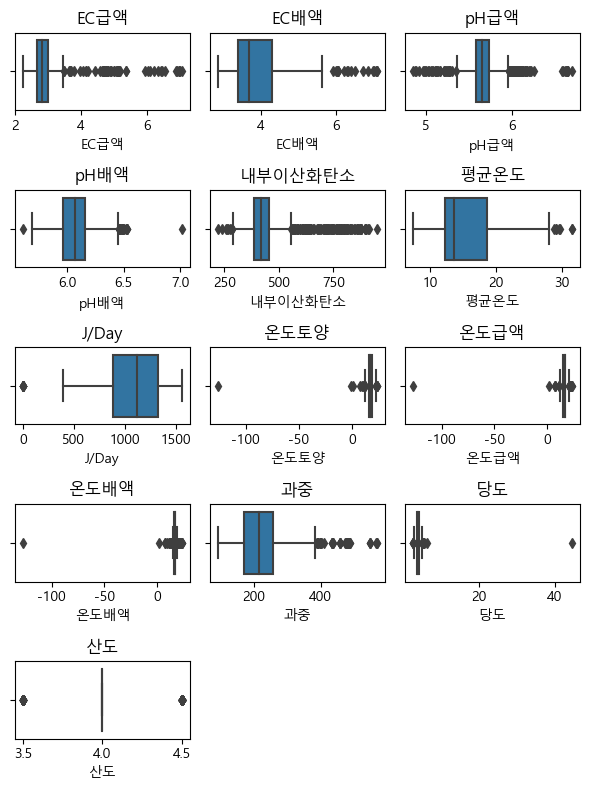

In [37]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom_origin.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom_origin[tom_origin.columns[i]])
    plt.title(tom_origin.columns[i])
plt.tight_layout()

In [38]:
print(tom_origin.isnull().sum())
print("----------------------------")
print(tom_origin.notnull().sum())

EC급액       153
EC배액       153
pH급액       153
pH배액       153
내부이산화탄소    153
평균온도       153
J/Day      803
온도토양       213
온도급액       982
온도배액       982
과중           0
당도           0
산도           0
dtype: int64
----------------------------
EC급액       1043
EC배액       1043
pH급액       1043
pH배액       1043
내부이산화탄소    1043
평균온도       1043
J/Day       393
온도토양        983
온도급액        214
온도배액        214
과중         1196
당도         1196
산도         1196
dtype: int64


### 환경데이터 셋 이전
- 급액 ph : (5.0이하 / 6.5이상 = 토마토 x)
- 배액 PH : (4.5이하 / 7.0이상 / 식물 X)
- 급액 ec : 2.5 ~ 3.5 적정
- 배액 ec : 3.5 ~ 4.5 적정
- co2 : 397 ~ 586
- 평균온도 : (10도 이하 / 30도 넘어가는 환경이 없음)
- 누적일사량 : 600 ~ 1300

In [39]:
# 환경데이터 셋에 맞추어 이상치 값 확인

In [40]:
# 사전확인
print(len(tom_origin[(tom_origin["pH급액"] <= 6.5) & (tom_origin["pH급액"] >= 5.0)]))
print("-----------------------------------------------------------------------------")
print(len(tom_origin[tom_origin["pH급액"] <= 5.0]))
print(len(tom_origin[tom_origin["pH급액"] >= 6.5]))

1022
-----------------------------------------------------------------------------
7
14


In [41]:
# 사전확인
print(len(tom_origin[(tom_origin["pH배액"] <= 7.0) & (tom_origin["pH배액"] >= 4.5)]))
print("-----------------------------------------------------------------------------")
print(len(tom_origin[tom_origin["pH배액"] <= 4.5]))
print(len(tom_origin[tom_origin["pH배액"] >= 7.0]))

1042
-----------------------------------------------------------------------------
0
1


In [42]:
print(len(tom_origin[(tom_origin["EC급액"] <= 3.5) & (tom_origin["EC급액"] >= 2.5)]))
print("-----------------------------------------------------------------------------")
print(len(tom_origin[tom_origin["EC급액"] <= 2.5]))
print(len(tom_origin[tom_origin["EC급액"] >= 3.5]))

870
-----------------------------------------------------------------------------
118
55


In [43]:
print(len(tom_origin[(tom_origin["EC배액"] <= 4.5) & (tom_origin["EC배액"] >= 3.5)]))
print("-----------------------------------------------------------------------------")
print(len(tom_origin[tom_origin["EC배액"] <= 3.5]))
print(len(tom_origin[tom_origin["EC배액"] >= 4.5]))

451
-----------------------------------------------------------------------------
372
221


In [44]:
print(len(tom_origin[(tom_origin["내부이산화탄소"] <= 586) & (tom_origin["내부이산화탄소"] >= 397)]))
print("-----------------------------------------------------------------------------")
print(len(tom_origin[tom_origin["내부이산화탄소"] <= 397]))
print(len(tom_origin[tom_origin["내부이산화탄소"] >= 586]))

599
-----------------------------------------------------------------------------
345
100


In [45]:
print(len(tom_origin[(tom_origin["평균온도"] <= 20.3) & (tom_origin["평균온도"] >= 17.5)]))
print("-----------------------------------------------------------------------------")
print(len(tom_origin[tom_origin["평균온도"] <= 17.5]))
print(len(tom_origin[tom_origin["평균온도"] >= 20.3]))

88
-----------------------------------------------------------------------------
741
214


In [46]:
print(len(tom_origin[(tom_origin["J/Day"] <= 1270) & (tom_origin["J/Day"] >= 600)]))
print("-----------------------------------------------------------------------------")
print(len(tom_origin[tom_origin["J/Day"] <= 600]))
print(len(tom_origin[tom_origin["J/Day"] >= 1300]))

239
-----------------------------------------------------------------------------
33
108


### * 참고
- tom1 GPS 정보:  35°36'0.95",  127°30'23.87" 코멘트: Jeollabuk-do Jangsu null Jangsu-eup 
- tom2 GPS 정보:  35°35'37.93",  127°30'28.94" 코멘트: Jeollabuk-do Jangsu null Jangsu-eup
- tom3 GPS 정보:  35°36'48.49",  127°26'43.47" 코멘트: Jeollabuk-do Jangsu null Jangsu-eup
- tom4 GPS 정보:  35°45'6.63",  129°11'5.14" 코멘트: Gyeongsangbuk-do Gyeongju null Naenam-myeon
- tom5 GPS 정보:  35°58'34.03",  129°16'27.04" 코멘트: Gyeongsangbuk-do Gyeongju null Gangdong-myeon
- tom6 GPS 정보:  35°4'4.13",  127°55'37.10" 코멘트: Gyeongsangnam-do Sacheon null Gonyang-myeon

#### 이상치 확인결과
- BOXPLOT과 환경데이터 셋의 공통컬럼 비교해 봤을 때, PH급액/PH배액/EC급액/EC배액/CO2 컬럼에 대해 상한 이상치 이상 데이터 삭제조치
- J/Day, 온도토양, 온도급액, 온도배액 : 특이점 이상치만 제거(차이가 많이 나는)
- 과중, 당도, 산도 : 특이점 이상치 행 제거

In [47]:
# # 1) EC급액, EC배액, CO2, PH급액, ph배액
# tom_origin.loc[tom_origin["EC급액"] >= 3.5, "EC급액"] = None
# tom_origin.loc[tom_origin["EC배액"] >= 4.5, "EC배액"] = None
# tom_origin.loc[(tom_origin["내부이산화탄소"] >= 586) | (tom_origin["내부이산화탄소"] <= 397), "내부이산화탄소"] = None
# tom_origin.loc[(tom_origin["pH급액"] >= 6.5) | (tom_origin["pH급액"] <= 5.0), "pH급액"] = None

In [48]:
# # 2) J/Day, 온도토양, 온도급액, 온도배액

# # J/Day : "0"값 15개 null값으로 변경
# # tom_origin["J/Day"].value_counts().sort_index()
# tom_origin.loc[tom_origin["J/Day"] < 600, "J/Day"] = None

# # 온도토양 : "10도 이하" null값으로 변경
# # tom_origin["온도토양"].value_counts().sort_index()
# tom_origin.loc[tom_origin["온도토양"] <= 10, "온도토양"] = None

# # 평균온도 : "10도이하, 30도 이상" null값으로 변경
# tom_origin.loc[(tom_origin["평균온도"] <= 10) | (tom_origin["평균온도"] >= 30), "평균온도"] = None

# # 온도급액 : "10도이하"  null값으로 변경
# # tom_origin["온도급액"].value_counts().sort_index()
# tom_origin.loc[tom_origin["온도급액"] <= 10, "온도급액"] = None

# # 온도배액 : "10도이하"  null값으로 변경
# # tom_origin["온도배액"].value_counts().sort_index()
# tom_origin.loc[tom_origin["온도배액"] <= 10 , "온도배액"] = None

In [49]:
# # 3) 과중, 당도, 산도 

# # 과중 : 변동없음 유지
# # tom_origin["과중"].value_counts().sort_index(ascending = False)

# # 당도 : "44.5" -> "4.5" 변경 / 콜라 당도 11임을 고려 존재 할 수 없는 토마토
# # tom_origin["당도"].value_counts().sort_index(ascending = False)
# tom_origin.loc[tom_origin["당도"] == tom_origin["당도"].max(), "당도"] = 4.5

# # 산도 : 변동없음 유지
# # tom_origin["산도"].value_counts().sort_index(ascending = False)

In [50]:
tom_origin["당도"].max()

44.5

In [51]:
print(tom_origin.loc[tom_origin["온도토양"] <= 0, "온도토양"])
print("------------------------------------------------------")
print(tom_origin.loc[tom_origin["온도급액"] <= 0, "온도급액"])
print("------------------------------------------------------")
print(tom_origin.loc[tom_origin["온도배액"] <= 0, "온도배액"])

32   -126.250000
53     -0.339782
Name: 온도토양, dtype: float64
------------------------------------------------------
32   -127.267857
Name: 온도급액, dtype: float64
------------------------------------------------------
32   -127.375
Name: 온도배액, dtype: float64


### 환경데이터 Set
- J/Day : 600 ~ 1300
- EC 급액 : 2.5 ~ 3.5
- EC 배액 : 3.5 ~ 5.0
- pH 급액 : 5.0 ~ 6.5 
- pH 배액 : 5.0 ~ 7.0
- 이산화탄소농도 : 400 ~ 600
- 평균온도, 온도토양/급액/배액 : 15 ~ 30

In [52]:
# 1) EC급액, EC배액, CO2, PH급액, ph배액
tom_origin.loc[(tom_origin["EC급액"] > 3.5) | (tom_origin["EC급액"] < 2.5), "EC급액"] = None
tom_origin.loc[(tom_origin["EC배액"] > 5.0) | (tom_origin["EC배액"] < 3.5), "EC배액"] = None
tom_origin.loc[(tom_origin["내부이산화탄소"] > 600) | (tom_origin["내부이산화탄소"] < 400), "내부이산화탄소"] = None
tom_origin.loc[(tom_origin["pH급액"] >= 6.5) | (tom_origin["pH급액"] <= 5.0), "pH급액"] = None
tom_origin.loc[(tom_origin["pH배액"] >= 7) | (tom_origin["pH급액"] <= 5.0), "pH급액"] = None

In [53]:
# 2) J/Day, 온도토양, 온도급액, 온도배액

# J/Day : "0"값 15개 null값으로 변경
# tom_origin["J/Day"].value_counts().sort_index()
tom_origin.loc[(tom_origin["J/Day"] < 600) | (tom_origin["J/Day"] > 1300), "J/Day"] = None

# 온도토양 : "10도 이하" null값으로 변경
# tom_origin["온도토양"].value_counts().sort_index()
tom_origin.loc[(tom_origin["온도토양"] <= 15) | (tom_origin["온도토양"] >= 30), "온도토양"] = None

# 평균온도 : "10도이하, 30도 이상" null값으로 변경
tom_origin.loc[(tom_origin["평균온도"] <= 15) | (tom_origin["평균온도"] >= 30), "평균온도"] = None

# 온도급액 : "10도이하"  null값으로 변경
# tom_origin["온도급액"].value_counts().sort_index()
tom_origin.loc[(tom_origin["온도급액"] <= 15) | (tom_origin["온도급액"] >= 30), "온도급액"] = None

# 온도배액 : "10도이하"  null값으로 변경
# tom_origin["온도배액"].value_counts().sort_index()
tom_origin.loc[(tom_origin["온도배액"] <= 15) | (tom_origin["온도배액"] >= 30) , "온도배액"] = None

In [54]:
# 3) 과중, 당도, 산도 

# 과중 : 변동없음 유지
# tom_origin["과중"].value_counts().sort_index(ascending = False)

# 당도 : "44.5" -> "4.5" 변경 / 콜라 당도 11임을 고려 존재 할 수 없는 토마토
# tom_origin["당도"].value_counts().sort_index(ascending = False)
tom_origin.loc[tom_origin["당도"] == tom_origin["당도"].max(), "당도"] = 4.5

# 산도 : 변동없음 유지
# tom_origin["산도"].value_counts().sort_index(ascending = False)

In [55]:
tom_origin

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,과중,당도,산도
1,2.957932,NaN,6.076204,5.830677,NaN,22.491605,1176.0,16.894489,17.831317,17.304435,205,4.1,4
2,2.957932,NaN,6.076204,5.830677,NaN,22.491605,1107.0,16.894489,17.831317,17.304435,210,4.7,4
3,NaN,NaN,NaN,NaN,NaN,NaN,1297.0,NaN,NaN,NaN,205,4.7,4
4,NaN,NaN,5.785397,5.952397,NaN,16.703968,NaN,NaN,NaN,NaN,206,4.7,4.5
5,2.957932,NaN,6.076204,5.830677,NaN,22.491605,1176.0,16.894489,17.831317,17.304435,223,4.3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,NaN,3.705833,5.606667,6.172000,NaN,NaN,NaN,20.227000,NaN,NaN,148,4.5,4
93,NaN,3.646833,5.630167,6.194500,NaN,NaN,NaN,19.312000,NaN,NaN,142,4.6,4
94,NaN,3.621500,5.631667,6.206333,NaN,NaN,NaN,18.660667,NaN,NaN,151,4.5,3.5
95,NaN,3.611667,5.647167,6.193000,NaN,NaN,NaN,18.066833,NaN,NaN,145,4.3,3.5


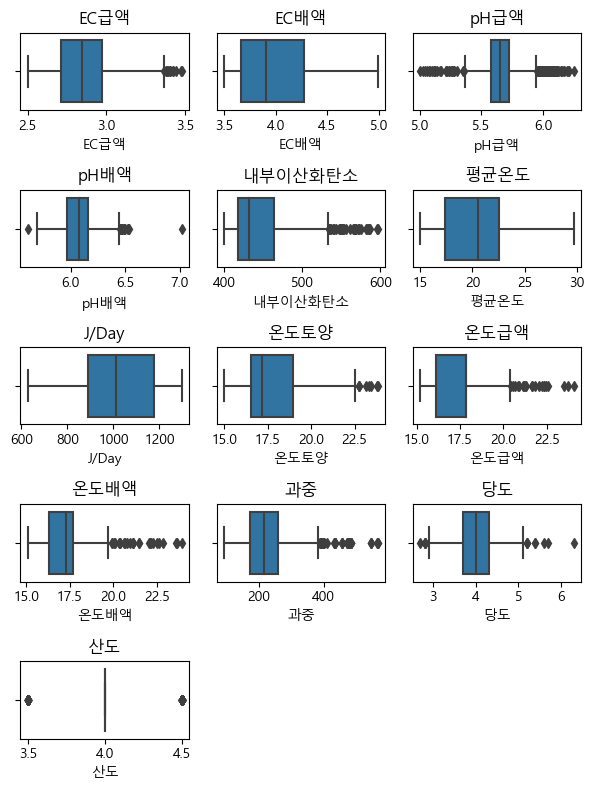

In [56]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom_origin.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom_origin[tom_origin.columns[i]])
    plt.title(tom_origin.columns[i])
plt.tight_layout()

### 원본데이터 checkpoint

In [57]:
# tom_origin.to_csv("tomato_farm_set/tom_origin.csv", encoding = "utf-8")

In [58]:
# R분석을 위한 결측치 0값 채우기
tom_origin_zero = tom_origin.fillna(0)
# tom_origin_zero.to_csv("tomato_farm_set/tom_origin_zero.csv", encoding = "utf-8")

### 정규화 해볼까?

In [59]:
X = tom_origin[tom_origin.columns[:-3]]
y = tom_origin[tom_origin.columns[-3:]]
scaler = StandardScaler()
tom_ori_X_scaler = scaler.fit_transform(X)
tom_ori_X_scaler = pd.DataFrame(tom_ori_X_scaler, columns = tom_origin.columns[:-3])

In [60]:
tom_ori_X_scaler

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액
0,0.445976,NaN,2.022707,-1.516784,NaN,0.744287,0.845923,-0.497883,0.052766,-0.130785
1,0.445976,NaN,2.022707,-1.516784,NaN,0.744287,0.504944,-0.497883,0.052766,-0.130785
2,NaN,NaN,NaN,NaN,NaN,NaN,1.443873,NaN,NaN,NaN
3,NaN,NaN,0.520745,-0.734723,NaN,-1.129176,NaN,NaN,NaN,NaN
4,0.445976,NaN,2.022707,-1.516784,NaN,0.744287,0.845923,-0.497883,0.052766,-0.130785
...,...,...,...,...,...,...,...,...,...,...
1191,NaN,-0.734423,-0.402360,0.676253,NaN,NaN,NaN,1.438595,NaN,NaN
1192,NaN,-0.878667,-0.280987,0.820818,NaN,NaN,NaN,0.906900,NaN,NaN
1193,NaN,-0.940603,-0.273240,0.896849,NaN,NaN,NaN,0.528419,NaN,NaN
1194,NaN,-0.964643,-0.193186,0.811181,NaN,NaN,NaN,0.183351,NaN,NaN


In [61]:
y = y.reset_index()
del y["index"]

### 원본데이터 scale Checkpoint

In [62]:
tom_ori_scaler = pd.concat([tom_ori_X_scaler, y], axis = 1)
tom_ori_scaler

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,과중,당도,산도
0,0.445976,NaN,2.022707,-1.516784,NaN,0.744287,0.845923,-0.497883,0.052766,-0.130785,205,4.1,4
1,0.445976,NaN,2.022707,-1.516784,NaN,0.744287,0.504944,-0.497883,0.052766,-0.130785,210,4.7,4
2,NaN,NaN,NaN,NaN,NaN,NaN,1.443873,NaN,NaN,NaN,205,4.7,4
3,NaN,NaN,0.520745,-0.734723,NaN,-1.129176,NaN,NaN,NaN,NaN,206,4.7,4.5
4,0.445976,NaN,2.022707,-1.516784,NaN,0.744287,0.845923,-0.497883,0.052766,-0.130785,223,4.3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,NaN,-0.734423,-0.402360,0.676253,NaN,NaN,NaN,1.438595,NaN,NaN,148,4.5,4
1192,NaN,-0.878667,-0.280987,0.820818,NaN,NaN,NaN,0.906900,NaN,NaN,142,4.6,4
1193,NaN,-0.940603,-0.273240,0.896849,NaN,NaN,NaN,0.528419,NaN,NaN,151,4.5,3.5
1194,NaN,-0.964643,-0.193186,0.811181,NaN,NaN,NaN,0.183351,NaN,NaN,145,4.3,3.5


In [63]:
# tom_ori_scaler.to_csv("tomato_farm_set/tom_ori_scaler.csv", encoding = "utf-8")

## 2) Simple imputer

In [64]:
# 평균
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
tom_mean = imputer.fit_transform(tom_origin)
tom_mean = pd.DataFrame(tom_mean, columns = tom_origin.columns)
tom_mean

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,과중,당도,산도
0,2.957932,4.006233,6.076204,5.830677,447.373519,22.491605,1176.000000,16.894489,17.831317,17.304435,205.0,4.1,4.0
1,2.957932,4.006233,6.076204,5.830677,447.373519,22.491605,1107.000000,16.894489,17.831317,17.304435,210.0,4.7,4.0
2,2.864418,4.006233,5.684571,6.066748,447.373519,20.192301,1297.000000,17.751303,17.730408,17.545886,205.0,4.7,4.0
3,2.864418,4.006233,5.785397,5.952397,447.373519,16.703968,1004.820565,17.751303,17.730408,17.545886,206.0,4.7,4.5
4,2.957932,4.006233,6.076204,5.830677,447.373519,22.491605,1176.000000,16.894489,17.831317,17.304435,223.0,4.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,2.864418,3.705833,5.606667,6.172000,447.373519,20.192301,1004.820565,20.227000,17.730408,17.545886,148.0,4.5,4.0
1192,2.864418,3.646833,5.630167,6.194500,447.373519,20.192301,1004.820565,19.312000,17.730408,17.545886,142.0,4.6,4.0
1193,2.864418,3.621500,5.631667,6.206333,447.373519,20.192301,1004.820565,18.660667,17.730408,17.545886,151.0,4.5,3.5
1194,2.864418,3.611667,5.647167,6.193000,447.373519,20.192301,1004.820565,18.066833,17.730408,17.545886,145.0,4.3,3.5


#### 파생컬럼 추가(EC비율, pH비율)

In [65]:
# EC공급과 배액의 차이가 과실성장에 영향을 미침을 확인 
# 동시에 PH비율도 확인해보자
tom_mean["EC비율"] = (tom_mean["EC배액"] / tom_mean["EC급액"])
tom_mean["pH비율"] = (tom_mean["pH배액"] / tom_mean["pH급액"])
tom_mean = tom_mean[['EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소', '평균온도', 'J/Day', '온도토양',
       '온도급액', '온도배액', 'EC비율', 'pH비율', '과중', '당도', '산도']]
tom_mean.head()

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,EC비율,pH비율,과중,당도,산도
0,2.957932,4.006233,6.076204,5.830677,447.373519,22.491605,1176.000000,16.894489,17.831317,17.304435,1.354403,0.959592,205.0,4.1,4.0
1,2.957932,4.006233,6.076204,5.830677,447.373519,22.491605,1107.000000,16.894489,17.831317,17.304435,1.354403,0.959592,210.0,4.7,4.0
2,2.864418,4.006233,5.684571,6.066748,447.373519,20.192301,1297.000000,17.751303,17.730408,17.545886,1.398620,1.067231,205.0,4.7,4.0
3,2.864418,4.006233,5.785397,5.952397,447.373519,16.703968,1004.820565,17.751303,17.730408,17.545886,1.398620,1.028866,206.0,4.7,4.5
4,2.957932,4.006233,6.076204,5.830677,447.373519,22.491605,1176.000000,16.894489,17.831317,17.304435,1.354403,0.959592,223.0,4.3,4.0


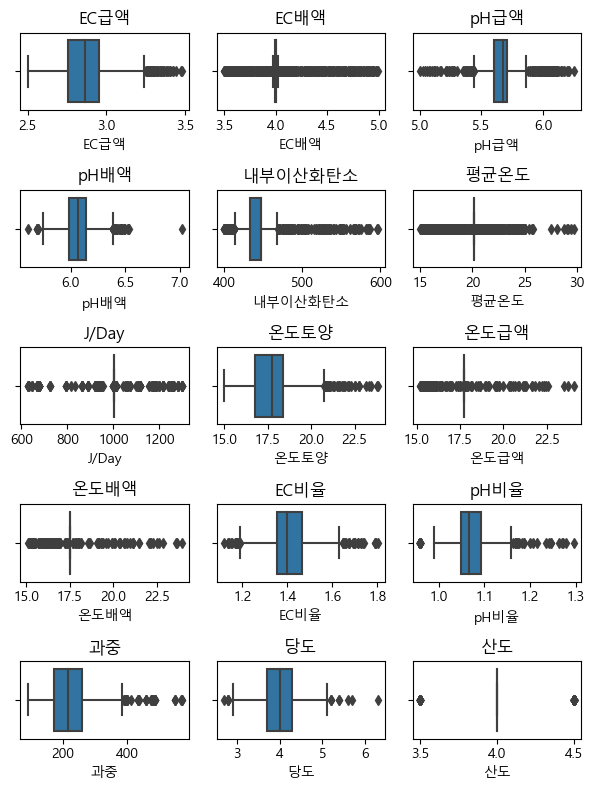

In [66]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom_mean.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom_mean[tom_mean.columns[i]])
    plt.title(tom_mean.columns[i])
plt.tight_layout()

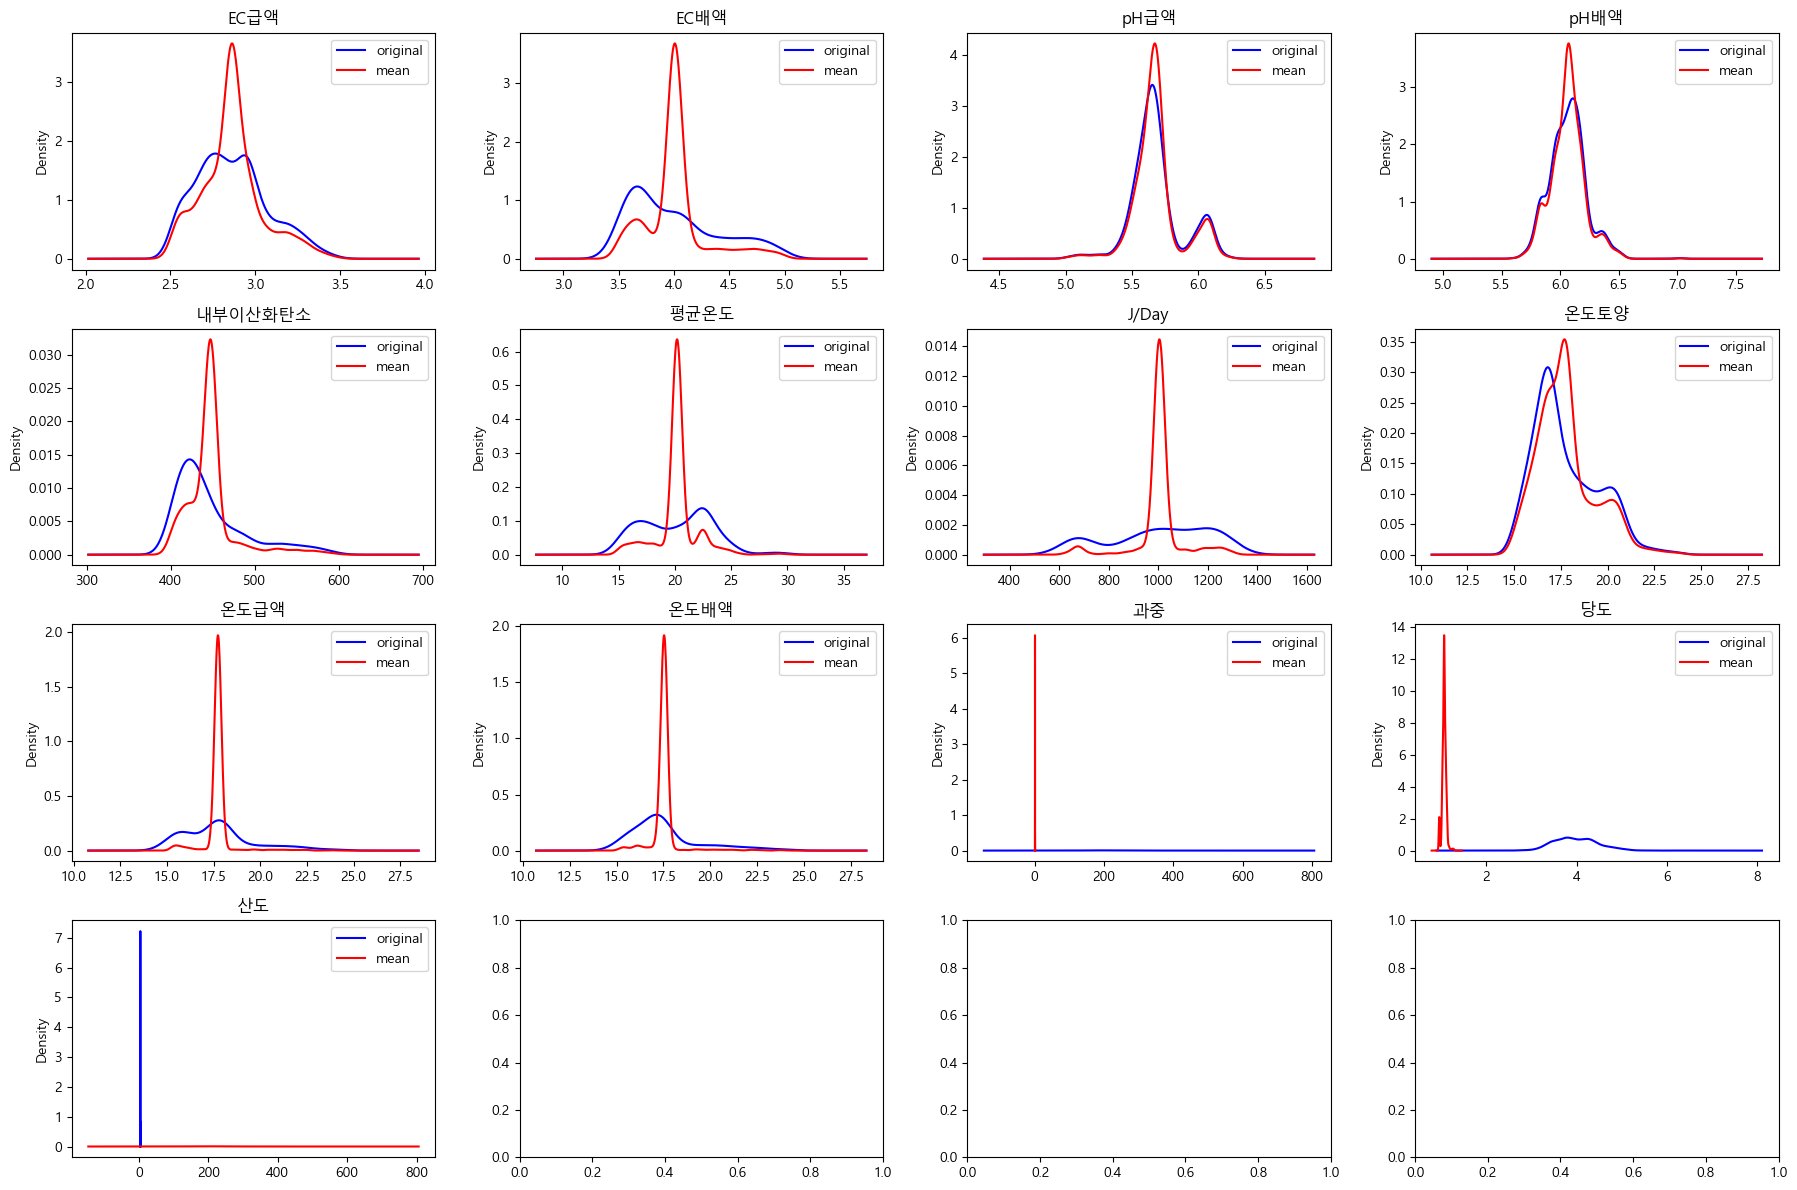

In [67]:
fig, axis = plt.subplots(nrows = 4, ncols = 4, figsize = (18, 12))

for i, (column1, column2) in enumerate(zip(tom_origin.columns, tom_mean.columns)):
    ax = axis[i//4, i%4]
    tom_origin[column1].plot(kind = "kde", ax = ax, color = "blue", label = 'original')
    tom_mean[column2].plot(kind = "kde", ax = ax, color = "red", label = "mean")
    ax.set_title(column1)
    ax.legend()
    
plt.tight_layout()

In [68]:
# 중앙값
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
tom_median = imputer.fit_transform(tom_origin)
tom_median = pd.DataFrame(tom_median, columns = tom_origin.columns)
tom_median

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,과중,당도,산도
0,2.957932,3.910250,6.076204,5.830677,432.416667,22.491605,1176.0,16.894489,17.831317,17.304435,205.0,4.1,4.0
1,2.957932,3.910250,6.076204,5.830677,432.416667,22.491605,1107.0,16.894489,17.831317,17.304435,210.0,4.7,4.0
2,2.844366,3.910250,5.655447,6.071500,432.416667,20.484872,1297.0,17.166167,17.831317,17.304435,205.0,4.7,4.0
3,2.844366,3.910250,5.785397,5.952397,432.416667,16.703968,1013.0,17.166167,17.831317,17.304435,206.0,4.7,4.5
4,2.957932,3.910250,6.076204,5.830677,432.416667,22.491605,1176.0,16.894489,17.831317,17.304435,223.0,4.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,2.844366,3.705833,5.606667,6.172000,432.416667,20.484872,1013.0,20.227000,17.831317,17.304435,148.0,4.5,4.0
1192,2.844366,3.646833,5.630167,6.194500,432.416667,20.484872,1013.0,19.312000,17.831317,17.304435,142.0,4.6,4.0
1193,2.844366,3.621500,5.631667,6.206333,432.416667,20.484872,1013.0,18.660667,17.831317,17.304435,151.0,4.5,3.5
1194,2.844366,3.611667,5.647167,6.193000,432.416667,20.484872,1013.0,18.066833,17.831317,17.304435,145.0,4.3,3.5


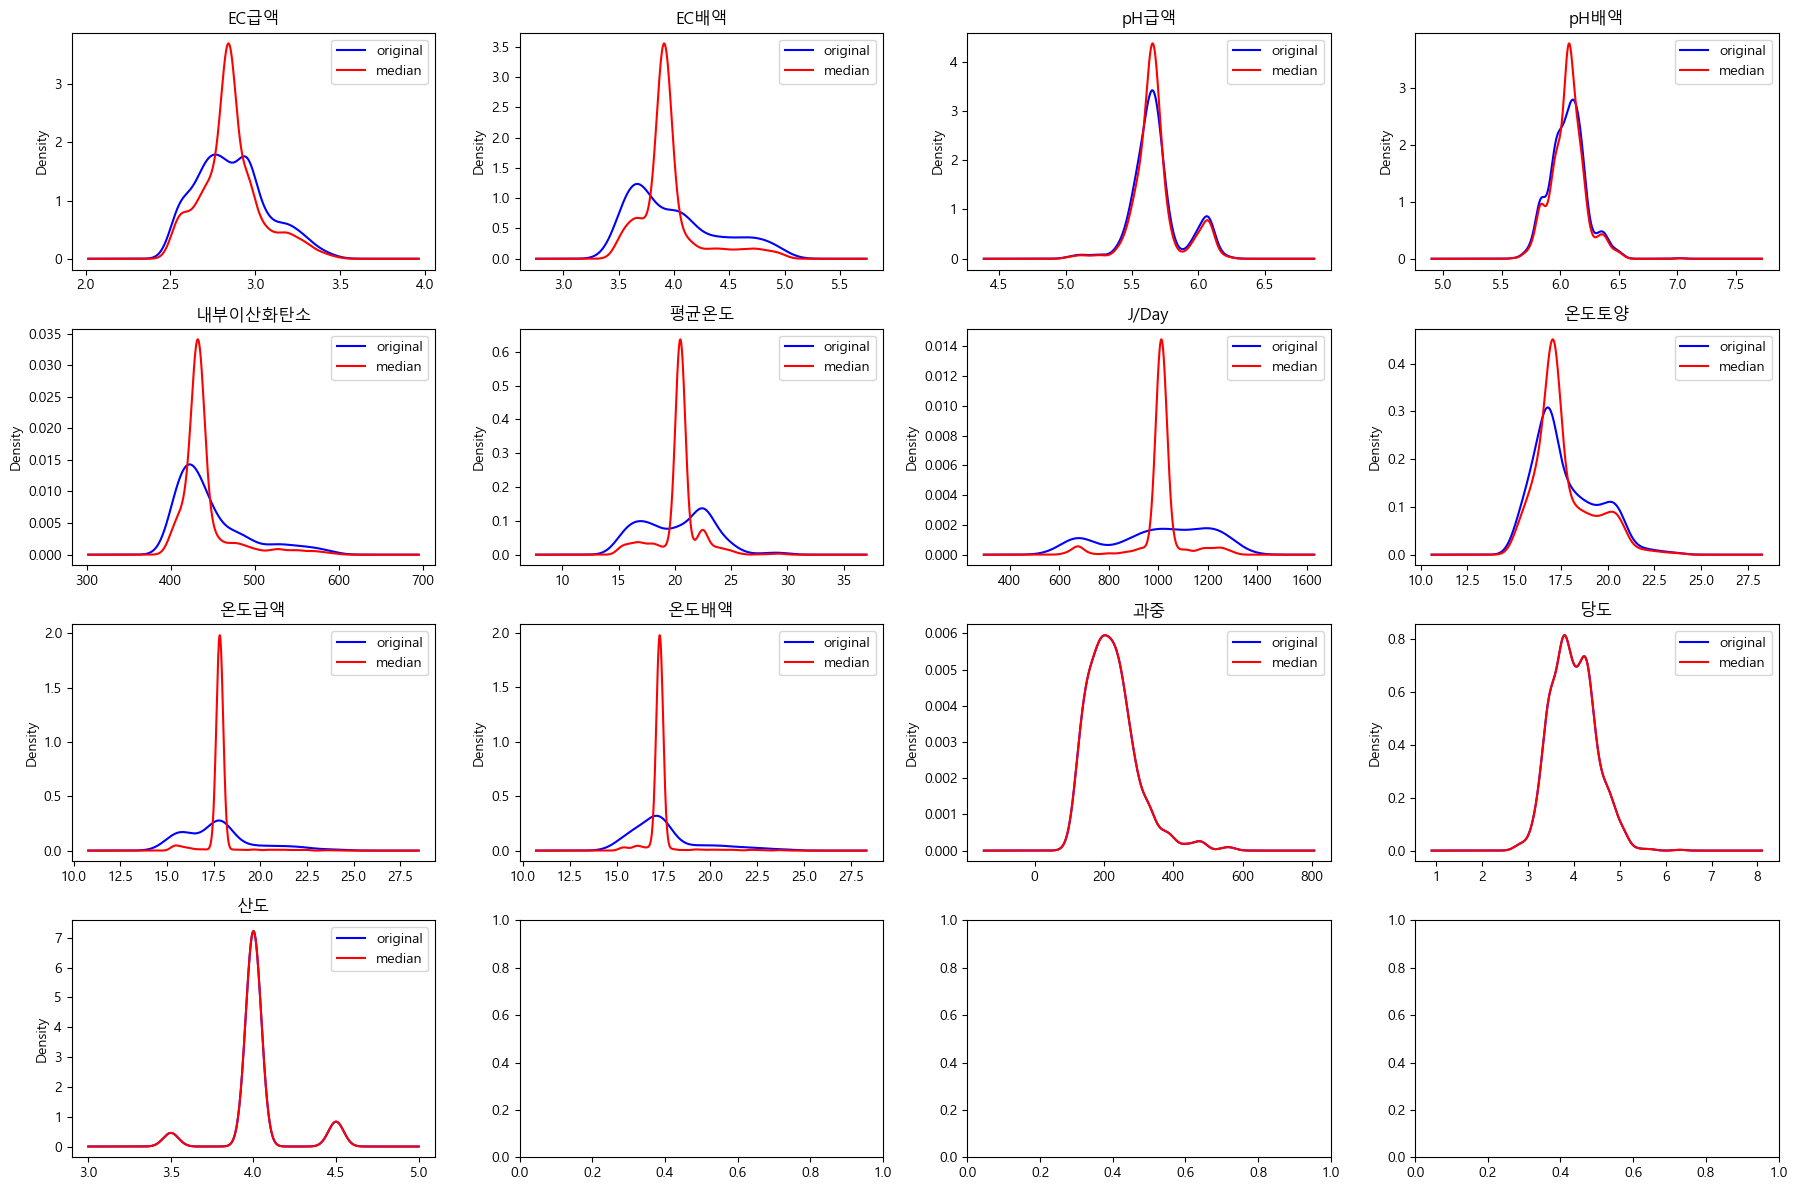

In [69]:
fig, axis = plt.subplots(nrows = 4, ncols = 4, figsize = (18, 12))

for i, (column1, column2) in enumerate(zip(tom_origin.columns, tom_median.columns)):
    ax = axis[i//4, i%4]
    tom_origin[column1].plot(kind = "kde", ax = ax, color = "blue", label = 'original')
    tom_median[column2].plot(kind = "kde", ax = ax, color = "red", label = "median")
    ax.set_title(column1)
    ax.legend()
    
plt.tight_layout()

#### 파생컬럼 추가(EC비율, pH비율)

In [70]:
tom_median["EC비율"] = (tom_median["EC배액"] / tom_median["EC급액"])
tom_median["pH비율"] = (tom_median["pH배액"] / tom_median["pH급액"])
tom_median = tom_median[['EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소', '평균온도', 'J/Day', '온도토양',
       '온도급액', '온도배액', 'EC비율', 'pH비율', '과중', '당도', '산도']]
tom_median.head()

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,EC비율,pH비율,과중,당도,산도
0,2.957932,3.91025,6.076204,5.830677,432.416667,22.491605,1176.0,16.894489,17.831317,17.304435,1.321954,0.959592,205.0,4.1,4.0
1,2.957932,3.91025,6.076204,5.830677,432.416667,22.491605,1107.0,16.894489,17.831317,17.304435,1.321954,0.959592,210.0,4.7,4.0
2,2.844366,3.91025,5.655447,6.071500,432.416667,20.484872,1297.0,17.166167,17.831317,17.304435,1.374735,1.073567,205.0,4.7,4.0
3,2.844366,3.91025,5.785397,5.952397,432.416667,16.703968,1013.0,17.166167,17.831317,17.304435,1.374735,1.028866,206.0,4.7,4.5
4,2.957932,3.91025,6.076204,5.830677,432.416667,22.491605,1176.0,16.894489,17.831317,17.304435,1.321954,0.959592,223.0,4.3,4.0


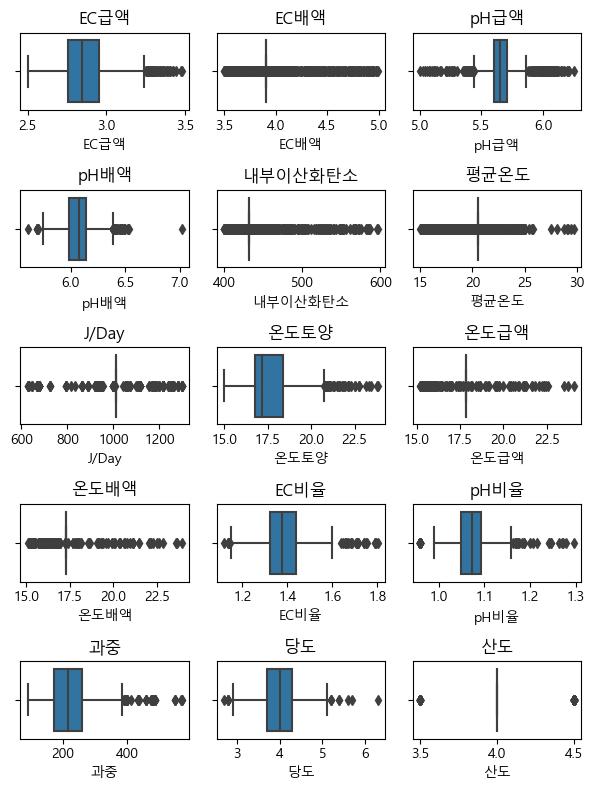

In [71]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom_median.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom_median[tom_median.columns[i]])
    plt.title(tom_median.columns[i])
plt.tight_layout()

## 3) KNN imputer

In [72]:
from sklearn.impute import KNNImputer
tom_knn = []
for i in range(3, 10, 2):
    imputer_i = KNNImputer(n_neighbors=i)
    print("n_neighbors :", i)
    tom_knn.append(imputer_i.fit_transform(tom_origin))

n_neighbors : 3
n_neighbors : 5
n_neighbors : 7
n_neighbors : 9


In [73]:
# numpy를 DataFrame으로 변환 / 컬럼 재설정
tom_knn_list = []
for i in range(len(tom_knn)):
    cvt_tom = pd.DataFrame(tom_knn[i])
    cvt_tom.columns = ['EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소', '평균온도', 'J/Day', '온도토양',
       '온도급액', '온도배액', '과중', '당도', '산도']
    tom_knn_list.append(cvt_tom)

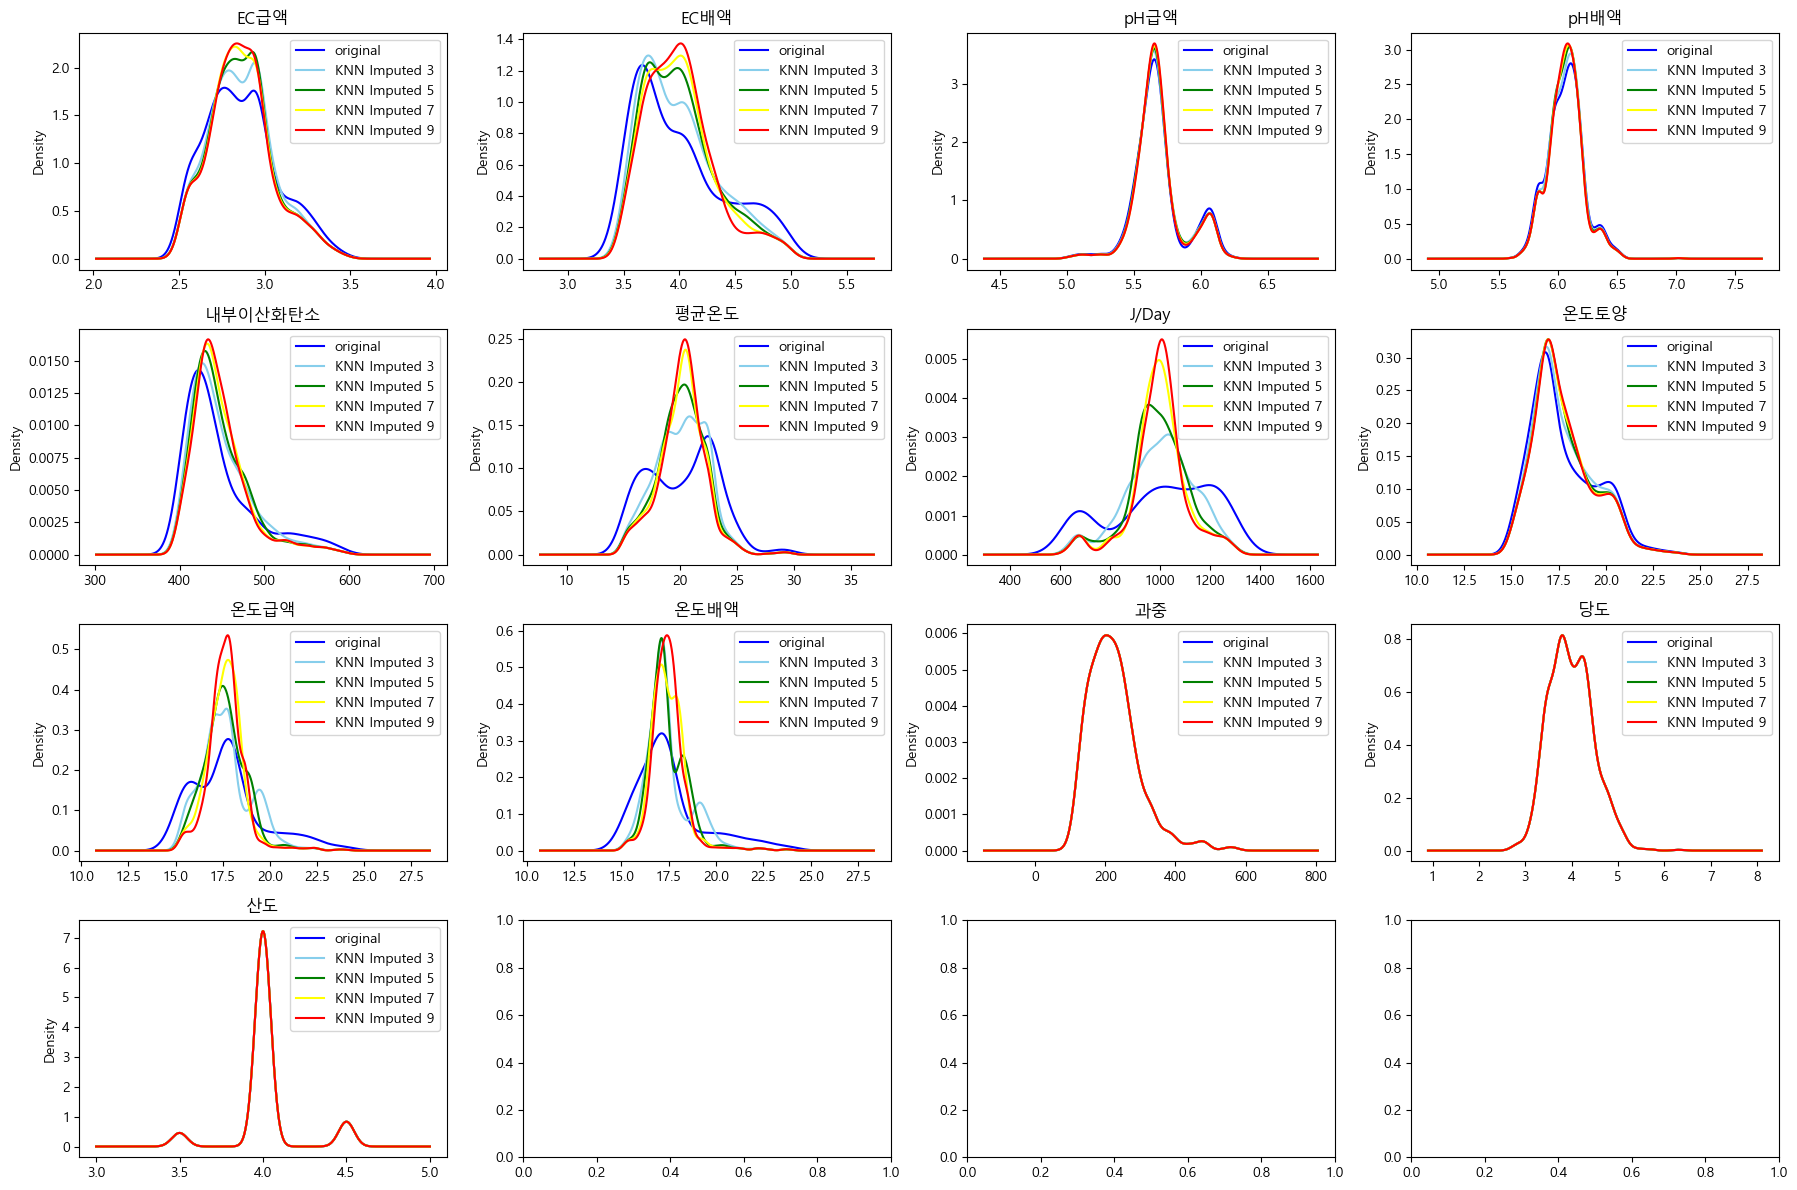

In [74]:
fig, axis = plt.subplots(nrows = 4, ncols = 4, figsize = (18, 12))

for i, (column1, column2, column3, column4, column5) in enumerate(zip(tom_origin.columns, tom_knn_list[0].columns,
                                          tom_knn_list[1].columns, tom_knn_list[2].columns,
                                          tom_knn_list[3].columns)):
    ax = axis[i//4, i%4]
    tom_origin[column1].plot(kind = "kde", ax = ax, color = "blue", label = 'original')
    tom_knn_list[0][column2].plot(kind = "kde", ax = ax, color = "skyblue", label = "KNN Imputed 3")
    tom_knn_list[1][column3].plot(kind = "kde", ax = ax, color = "green", label = "KNN Imputed 5")
    tom_knn_list[2][column4].plot(kind = "kde", ax = ax, color = "yellow", label = "KNN Imputed 7")
    tom_knn_list[3][column5].plot(kind = "kde", ax = ax, color = "red", label = "KNN Imputed 9")
    ax.set_title(column1)
    ax.legend()
    
plt.tight_layout()

#### 파생컬럼 추가(EC비율, pH비율)

In [75]:
tom_knn_list[3]["EC비율"] = (tom_knn_list[3]["EC배액"] / tom_knn_list[3]["EC급액"])
tom_knn_list[3]["pH비율"] = (tom_knn_list[3]["pH배액"] / tom_knn_list[3]["pH급액"])
tom_knn_list[3] = tom_knn_list[3][['EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소', '평균온도', 'J/Day', '온도토양',
       '온도급액', '온도배액', 'EC비율', 'pH비율', '과중', '당도', '산도']]
tom_knn_list[3].head()

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,EC비율,pH비율,과중,당도,산도
0,2.957932,3.902013,6.076204,5.830677,438.269647,22.491605,1176.0000,16.894489,17.831317,17.304435,1.319169,0.959592,205.0,4.1,4.0
1,2.957932,3.893661,6.076204,5.830677,454.822656,22.491605,1107.0000,16.894489,17.831317,17.304435,1.316345,0.959592,210.0,4.7,4.0
2,2.776685,4.068116,5.669125,5.994535,436.082610,17.699105,1297.0000,17.062241,18.388887,18.738113,1.465098,1.057400,205.0,4.7,4.0
3,2.720623,4.158765,5.785397,5.952397,455.115243,16.703968,1022.7809,16.844459,17.877353,17.629446,1.528608,1.028866,206.0,4.7,4.5
4,2.957932,3.674743,6.076204,5.830677,424.248148,22.491605,1176.0000,16.894489,17.831317,17.304435,1.242335,0.959592,223.0,4.3,4.0


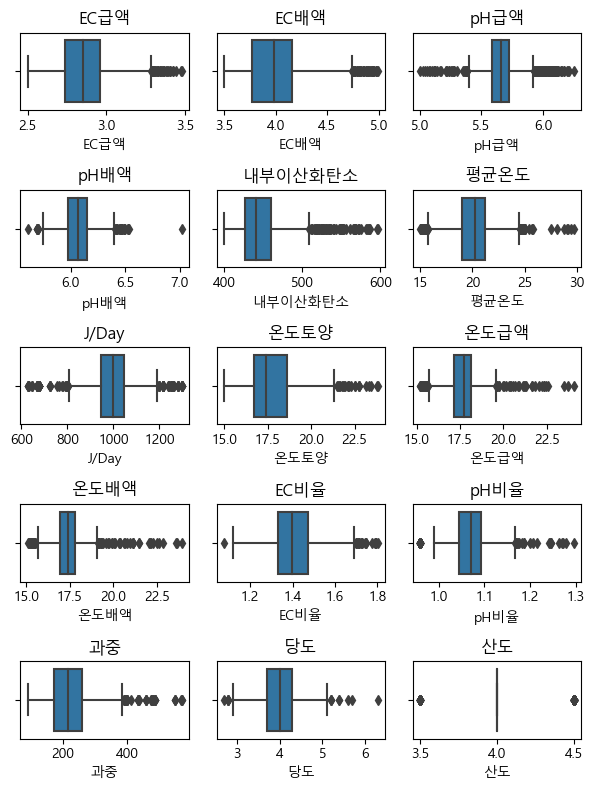

In [76]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom_knn_list[3].columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom_knn_list[3][tom_knn_list[3].columns[i]])
    plt.title(tom_knn_list[3].columns[i])
plt.tight_layout()

### KNN imputer Checkpoint

In [77]:
# # neighbor 9 모델 저장
# tom_knn_list[3].to_csv("tomato_farm_set/tom_knn.csv", encoding = "utf-8")

### KNN imputer scale Checkpoint

In [78]:
X = tom_knn_list[3][tom_knn_list[3].columns[:-3]]
y = tom_knn_list[3][tom_knn_list[3].columns[-3:]]
scaler = StandardScaler()
tom_knn_X_scaler = scaler.fit_transform(X)
tom_knn_X_scaler = pd.DataFrame(tom_knn_X_scaler, columns = tom_knn_list[3].columns[:-3])

In [79]:
tom_knn_scale = pd.concat([tom_knn_X_scaler, y], axis = 1)

In [80]:
# tom_knn_scale.to_csv("tomato_farm_set/tom_knn_scale.csv", encoding = "utf-8")

## 4) Multivariate feature imputation

In [81]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10000, random_state = 0)
tom_mul = imputer.fit_transform(tom_origin)
tom_mul

array([[  2.95793247,   3.92282815,   6.0762043 , ..., 205.        ,
          4.1       ,   4.        ],
       [  2.95793247,   3.84812867,   6.0762043 , ..., 210.        ,
          4.7       ,   4.        ],
       [  2.82949906,   4.23899676,   5.60598879, ..., 205.        ,
          4.7       ,   4.        ],
       ...,
       [  2.78189986,   3.6215    ,   5.63166667, ..., 151.        ,
          4.5       ,   3.5       ],
       [  2.75393101,   3.61166667,   5.64716667, ..., 145.        ,
          4.3       ,   3.5       ],
       [  2.72889222,   3.59766667,   5.65916667, ..., 220.        ,
          4.4       ,   4.        ]])

In [82]:
# numpy를 DataFrame으로 변환 / 컬럼 재설정
tom_mul = pd.DataFrame(tom_mul)
tom_mul.columns = ['EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소', '평균온도', 'J/Day', '온도토양',
   '온도급액', '온도배액', '과중', '당도', '산도']
tom_mul.head()

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,과중,당도,산도
0,2.957932,3.922828,6.076204,5.830677,421.988927,22.491605,1176.000000,16.894489,17.831317,17.304435,205.0,4.1,4.0
1,2.957932,3.848129,6.076204,5.830677,428.541311,22.491605,1107.000000,16.894489,17.831317,17.304435,210.0,4.7,4.0
2,2.829499,4.238997,5.605989,6.027899,417.198533,19.793010,1297.000000,18.685161,17.732562,17.886304,205.0,4.7,4.0
3,2.773942,3.884946,5.785397,5.952397,463.544867,16.703968,1002.200764,17.528969,17.391520,17.578203,206.0,4.7,4.5
4,2.957932,3.941803,6.076204,5.830677,424.636472,22.491605,1176.000000,16.894489,17.831317,17.304435,223.0,4.3,4.0


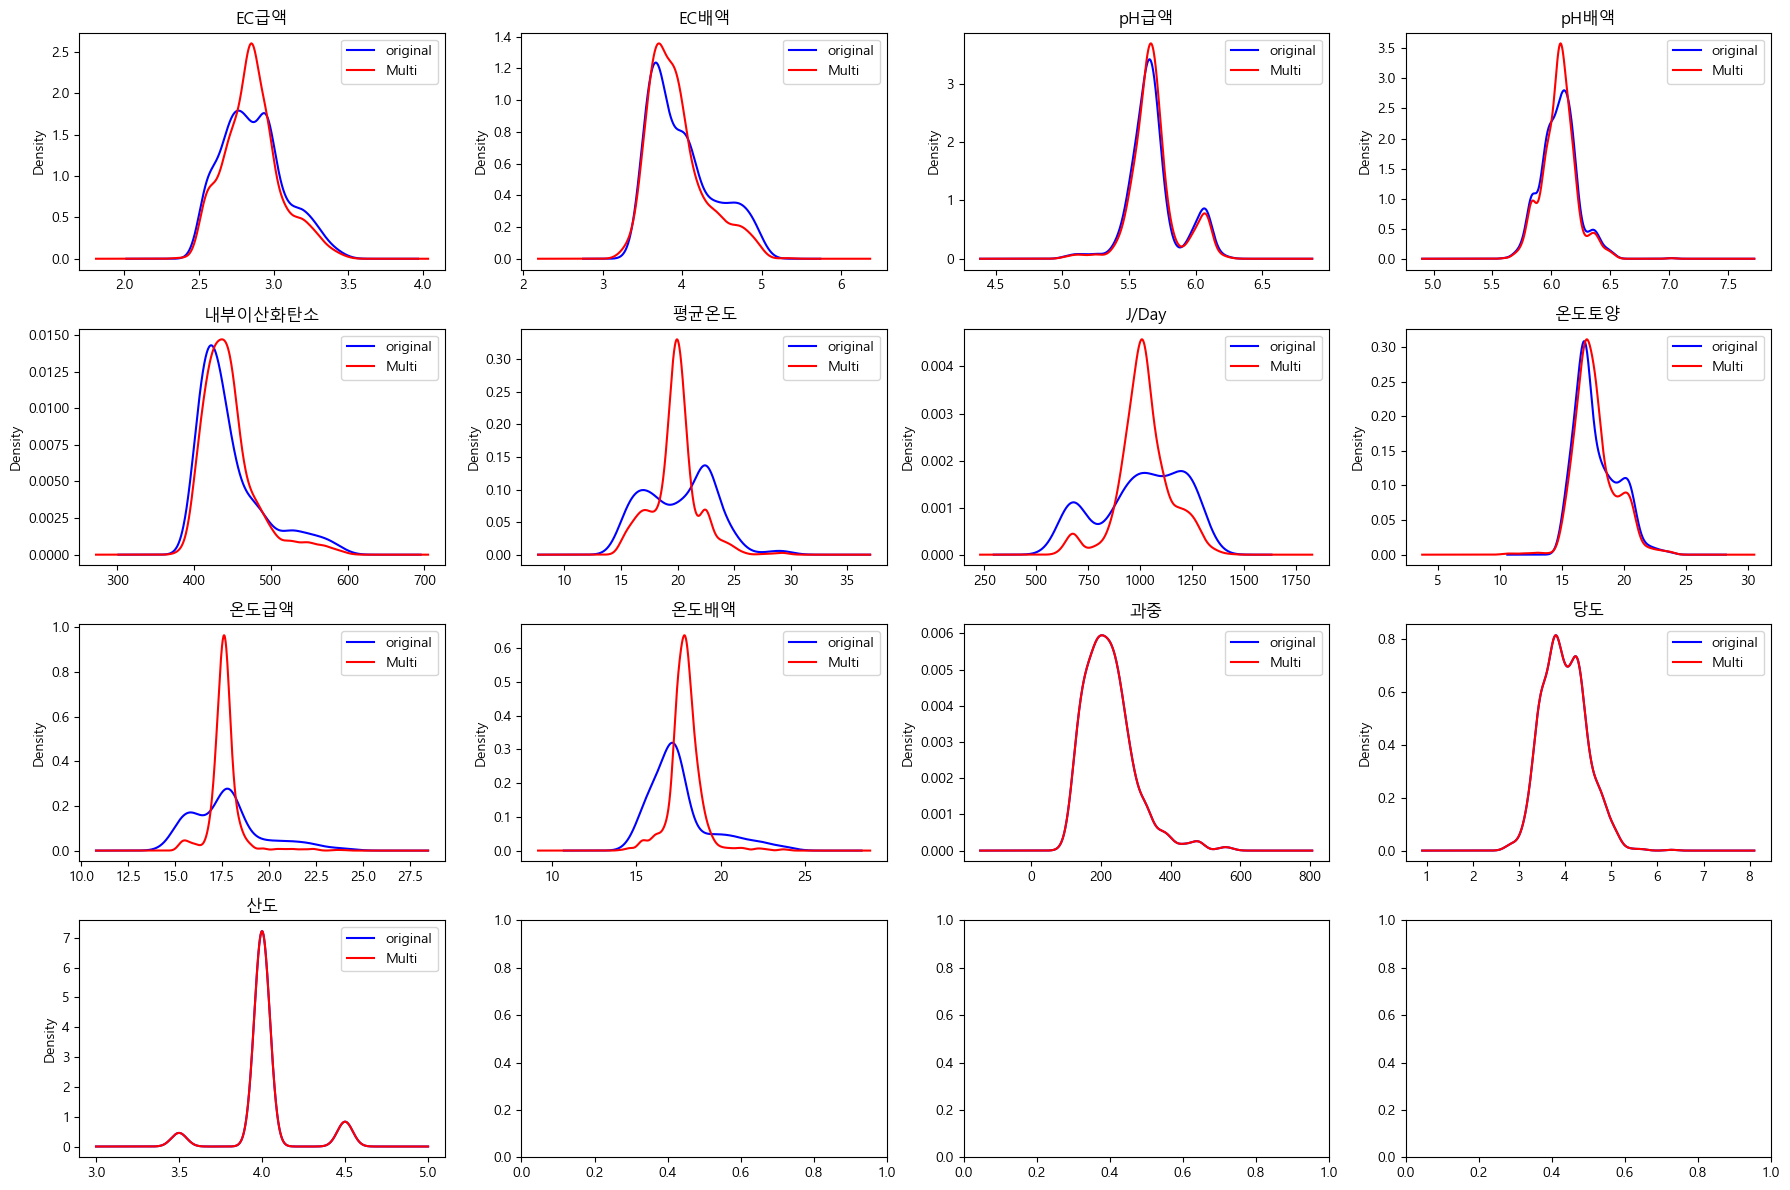

In [83]:
fig, axis = plt.subplots(nrows = 4, ncols = 4, figsize = (18, 12))

for i, (column1, column2) in enumerate(zip(tom_origin.columns, tom_mul.columns)):
    ax = axis[i//4, i%4]
    tom_origin[column1].plot(kind = "kde", ax = ax, color = "blue", label = 'original')
    tom_mul[column2].plot(kind = "kde", ax = ax, color = "red", label = "Multi")
    ax.set_title(column1)
    ax.legend()
    
plt.tight_layout()

#### 파생컬럼 추가(EC비율, pH비율)

In [84]:
tom_mul["EC비율"] = (tom_mul["EC배액"] / tom_mul["EC급액"])
tom_mul["pH비율"] = (tom_mul["pH배액"] / tom_mul["pH급액"])
tom_mul = tom_mul[['EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소', '평균온도', 'J/Day', '온도토양',
       '온도급액', '온도배액', 'EC비율', 'pH비율', '과중', '당도', '산도']]
tom_mul.head()

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,EC비율,pH비율,과중,당도,산도
0,2.957932,3.922828,6.076204,5.830677,421.988927,22.491605,1176.000000,16.894489,17.831317,17.304435,1.326206,0.959592,205.0,4.1,4.0
1,2.957932,3.848129,6.076204,5.830677,428.541311,22.491605,1107.000000,16.894489,17.831317,17.304435,1.300952,0.959592,210.0,4.7,4.0
2,2.829499,4.238997,5.605989,6.027899,417.198533,19.793010,1297.000000,18.685161,17.732562,17.886304,1.498144,1.075261,205.0,4.7,4.0
3,2.773942,3.884946,5.785397,5.952397,463.544867,16.703968,1002.200764,17.528969,17.391520,17.578203,1.400514,1.028866,206.0,4.7,4.5
4,2.957932,3.941803,6.076204,5.830677,424.636472,22.491605,1176.000000,16.894489,17.831317,17.304435,1.332621,0.959592,223.0,4.3,4.0


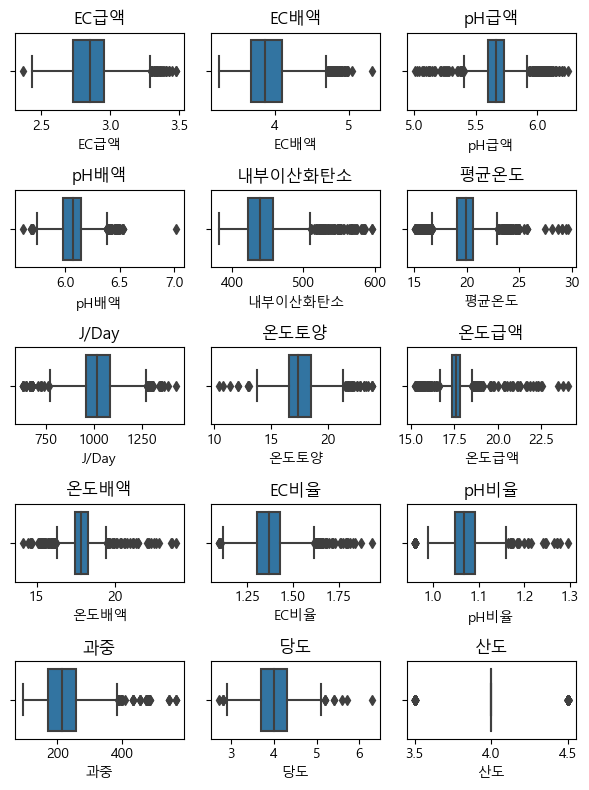

In [85]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom_mul.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom_mul[tom_mul.columns[i]])
    plt.title(tom_mul.columns[i])
plt.tight_layout()

### Multi imputer Checkpoint

In [86]:
# tom_mul.to_csv("tomato_farm_set/tom_mul.csv", encoding = "utf-8")

### Multi imputer scale Checkpoint

In [87]:
X = tom_mul[tom_mul.columns[:-3]]
y = tom_mul[tom_mul.columns[-3:]]
scaler = StandardScaler()
tom_mul_X_scaler = scaler.fit_transform(X)
tom_mul_X_scaler = pd.DataFrame(tom_mul_X_scaler, columns = tom_mul.columns[:-3])

In [88]:
tom_mul_scale = pd.concat([tom_mul_X_scaler, y], axis = 1)

In [89]:
# tom_mul_scale.to_csv("tomato_farm_set/tom_mul_scale.csv", encoding = "utf-8")

## *데이터 재정립 
- 1번 j.day => 5번 j.day 채우기 / 필요없음 (5번 농장 J.DAY 발견)

In [90]:
# farm1_unit = farm1[["날짜", "J/Day"]]
# print(farm1_unit["날짜"].min(), "/", farm1_unit["날짜"].max())

In [91]:
# print(farm5["날짜"].min(), "/", farm5["날짜"].max())

In [92]:
# farm5_1 = farm5
# del farm5_1["J/Day"]

In [93]:
# pd.merge(farm1_unit, farm5_1, how = "inner") 

In [94]:
# farm1_c = farm1[farm1["J/Day"] != 0]
# farm1_c[farm1_c['날짜'] > "2021-11-10"] # 1번 농장 0이 아닌 데이터 중에서 5번 농장 시작기간(11월 10일)에 맞게 119개 추출(5번 데이터 갯수)

In [95]:
# farm1_out = farm1_c[farm1_c['날짜'] > "2021-11-10"].iloc[0:119, :]
# farm1_out["J/Day"].values
# farm5_c = farm5

In [96]:
# farm5_c["J/Day"] = farm1_out["J/Day"].values

## 5) 5번 농장 뿔리기?
- 각 컬럼마다 가지는 mean, std를 따르는 정규분포 난수 대입

In [97]:
dst1 = pd.concat(dst_tom_21, axis = 0)
dst2 = pd.concat(dst_tom_22, axis = 0)
dst_df = pd.concat([dst1, dst2], axis = 0)

In [98]:
dst_df

,주차,과중,당도,산도
1,45,205,4.1,4
2,45,210,4.7,4
3,45,205,4.7,4
4,45,206,4.7,4.5
5,45,223,4.3,4
...,...,...,...,...
96,06,81,3.9,4
97,06,158,3.7,4
98,06,134,3.8,4.5
99,06,137,3.5,4.5


In [99]:
farm5["날짜"] = pd.to_datetime(farm5["날짜"])

In [100]:
# farm5에 "주차" 컬럼 추가
week_list = []
for i in farm5["날짜"]:
    b = pd.to_datetime("2021-01-01")
    weeks = math.trunc((i - b).days / 7)
    if weeks <= 52:
        week_list.append(str(weeks).zfill(2))
    elif weeks > 52:
        week_list.append(str(weeks - 52).zfill(2))

In [101]:
farm5["주차"] = week_list

In [102]:
dst_df.index = np.arange(len(dst_df))
dst_df = dst_df.reset_index()

In [103]:
farm5 = farm5.reset_index()

In [104]:
tom5_df = pd.concat([farm5, dst_df], axis = 1)
del tom5_df["index"]

In [105]:
del tom5_df["날짜"]

In [106]:
tom5_df.describe()
#          J/Day	 평균온도	 EC급액	   EC배액	        pH급액	pH배액	 내부이산화탄소	온도토양	온도급액	온도배액
# mean	921.829249	17.189244	2.745358	4.183593	6.383289	6.191583	391.681817	15.879518	15.599672	15.744600
# std	342.949775	5.395624	0.256896	0.692894	0.236881	0.305221	93.605860	3.260943	4.119580	4.061744
tom5_df.isnull().sum() # 932개 값 정규분포 난수 넣기

J/Day      932
평균온도       932
EC급액       932
EC배액       932
pH급액       932
pH배액       932
내부이산화탄소    932
온도토양       932
온도급액       932
온도배액       932
주차         932
주차           0
과중           0
당도           0
산도           0
dtype: int64

In [107]:
tom5_df.columns[:-6]

Index(['J/Day', '평균온도', 'EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소', '온도토양',
       '온도급액'],
      dtype='object')

In [108]:
# 정규분포 난수 넣기
# np.random.normal(평균, 표준편차, 크기)
for col in tom5_df.columns[:-6]:
    tom5_df.loc[tom5_df[col].isnull() == True, col] = \
    np.random.normal(tom5_df[col].mean(), tom5_df[col].std(), tom5_df[col].isnull().sum())

In [109]:
del tom5_df["주차"]

#### 파생컬럼 추가(EC비율, pH비율)

In [110]:
tom5_df["EC비율"] = (tom5_df["EC배액"] / tom5_df["EC급액"])
tom5_df["pH비율"] = (tom5_df["pH배액"] / tom5_df["pH급액"])
tom5_df = tom_mul[['EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소', '평균온도', 'J/Day', '온도토양',
       '온도급액', '온도배액', 'EC비율', 'pH비율', '과중', '당도', '산도']]
tom5_df.head()

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,EC비율,pH비율,과중,당도,산도
0,2.957932,3.922828,6.076204,5.830677,421.988927,22.491605,1176.000000,16.894489,17.831317,17.304435,1.326206,0.959592,205.0,4.1,4.0
1,2.957932,3.848129,6.076204,5.830677,428.541311,22.491605,1107.000000,16.894489,17.831317,17.304435,1.300952,0.959592,210.0,4.7,4.0
2,2.829499,4.238997,5.605989,6.027899,417.198533,19.793010,1297.000000,18.685161,17.732562,17.886304,1.498144,1.075261,205.0,4.7,4.0
3,2.773942,3.884946,5.785397,5.952397,463.544867,16.703968,1002.200764,17.528969,17.391520,17.578203,1.400514,1.028866,206.0,4.7,4.5
4,2.957932,3.941803,6.076204,5.830677,424.636472,22.491605,1176.000000,16.894489,17.831317,17.304435,1.332621,0.959592,223.0,4.3,4.0


In [111]:
tom_mul.head()

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,EC비율,pH비율,과중,당도,산도
0,2.957932,3.922828,6.076204,5.830677,421.988927,22.491605,1176.000000,16.894489,17.831317,17.304435,1.326206,0.959592,205.0,4.1,4.0
1,2.957932,3.848129,6.076204,5.830677,428.541311,22.491605,1107.000000,16.894489,17.831317,17.304435,1.300952,0.959592,210.0,4.7,4.0
2,2.829499,4.238997,5.605989,6.027899,417.198533,19.793010,1297.000000,18.685161,17.732562,17.886304,1.498144,1.075261,205.0,4.7,4.0
3,2.773942,3.884946,5.785397,5.952397,463.544867,16.703968,1002.200764,17.528969,17.391520,17.578203,1.400514,1.028866,206.0,4.7,4.5
4,2.957932,3.941803,6.076204,5.830677,424.636472,22.491605,1176.000000,16.894489,17.831317,17.304435,1.332621,0.959592,223.0,4.3,4.0


### 뿔린 5번 농장(난수 data 대입) Checkpoint

In [112]:
# tom5_df.to_csv("tomato_farm_set/tom5_df.csv", encoding = "utf-8")

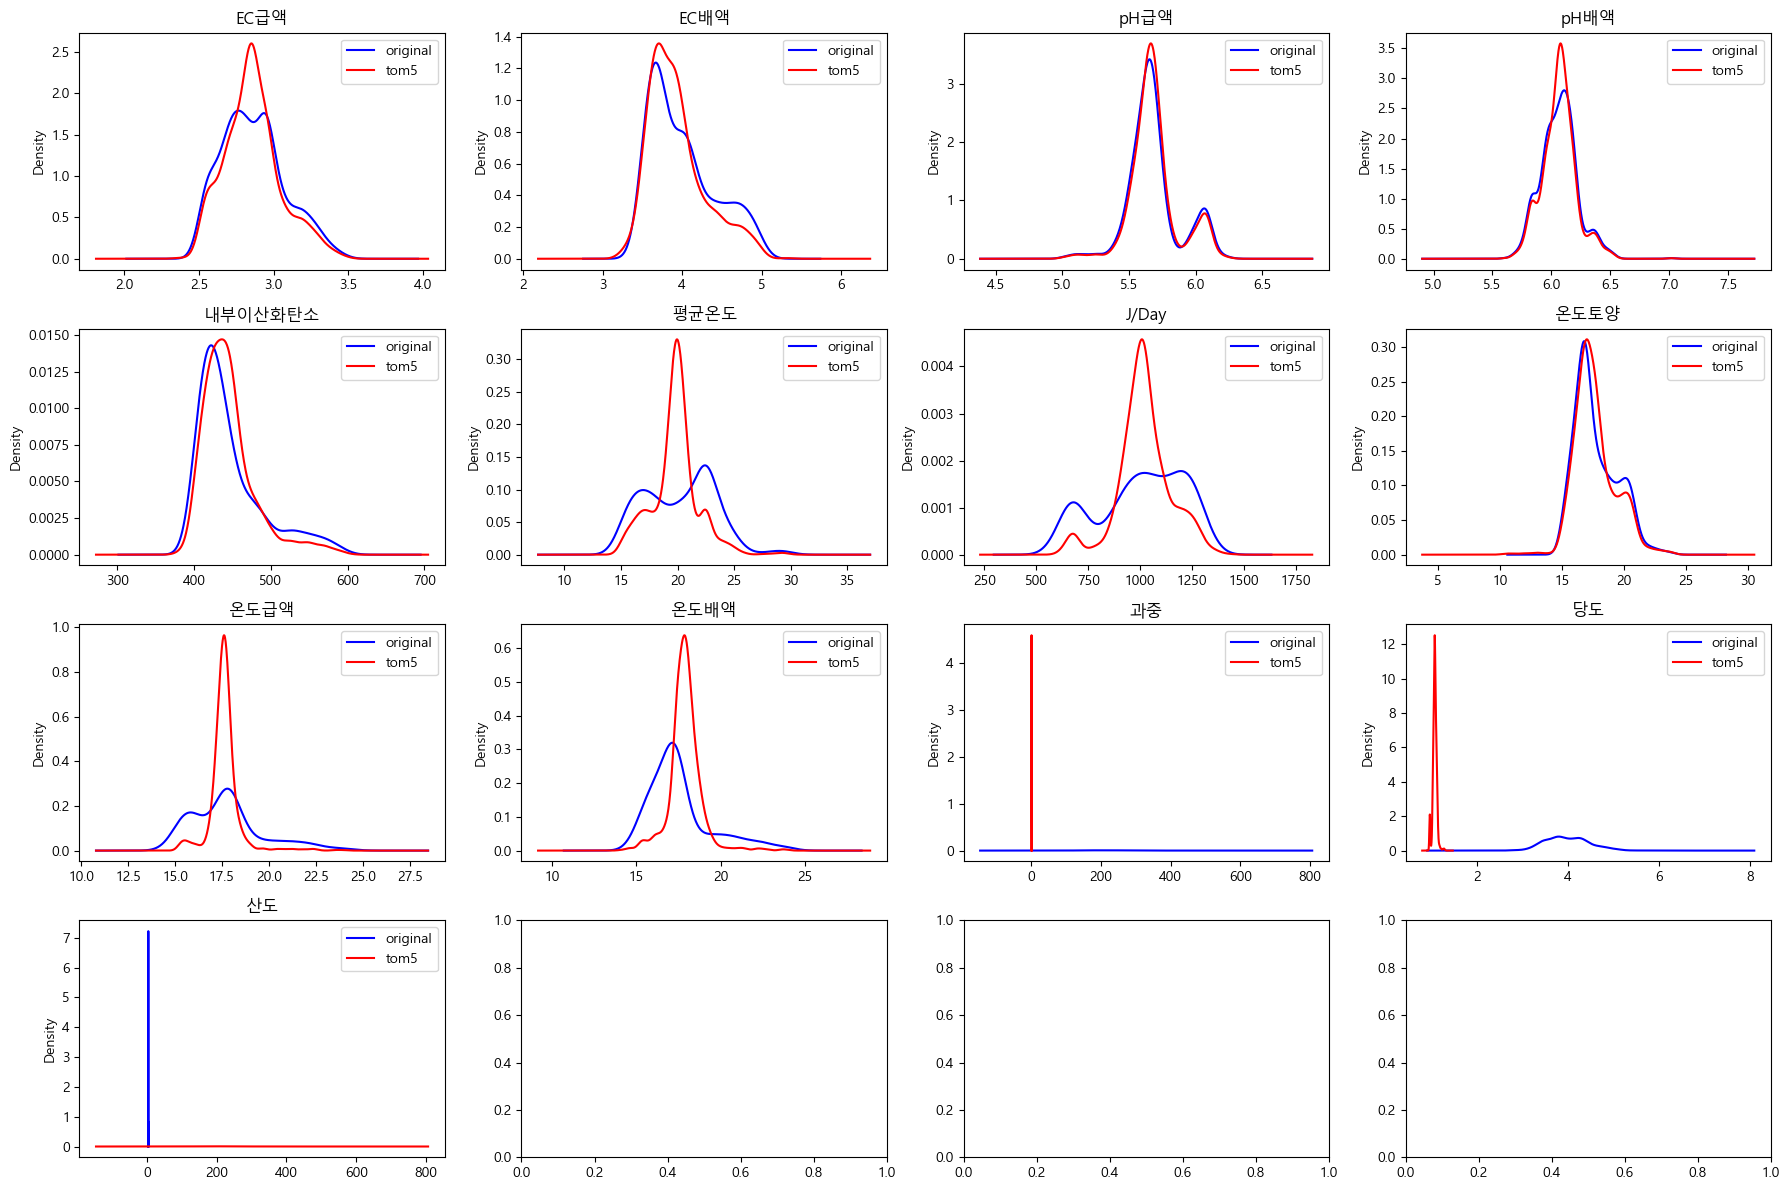

In [113]:
fig, axis = plt.subplots(nrows = 4, ncols = 4, figsize = (18, 12))

for i, (column1, column2) in enumerate(zip(tom_origin.columns, tom5_df.columns)):
    ax = axis[i//4, i%4]
    tom_origin[column1].plot(kind = "kde", ax = ax, color = "blue", label = 'original')
    tom5_df[column2].plot(kind = "kde", ax = ax, color = "red", label = "tom5")
    ax.set_title(column1)
    ax.legend()
    
plt.tight_layout()

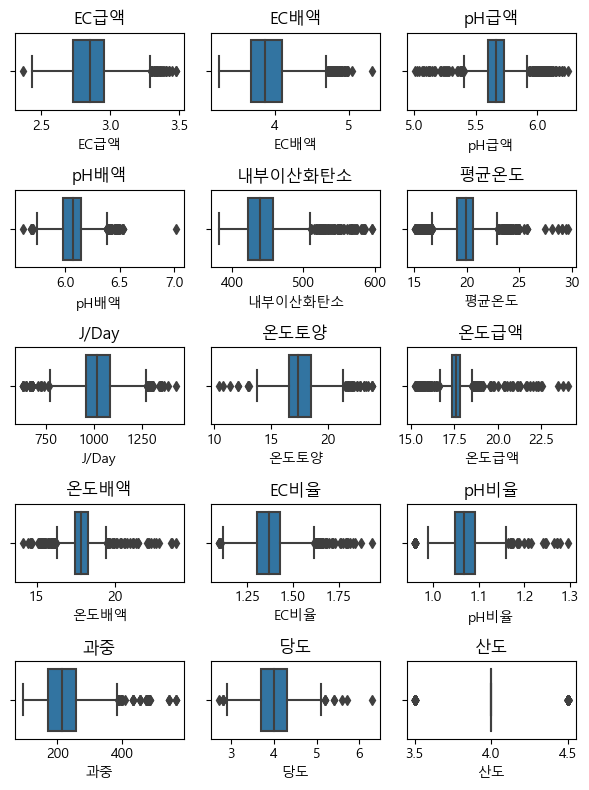

In [114]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom5_df.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom5_df[tom5_df.columns[i]])
    plt.title(tom5_df.columns[i])
plt.tight_layout()

### 뿔린 5번 농장(난수 data 대입) scale Checkpoint

In [115]:
X = tom5_df[tom5_df.columns[:-3]]
y = tom5_df[tom5_df.columns[-3:]]
scaler = StandardScaler()
tom5_X_scaler = scaler.fit_transform(X)
tom5_X_scaler = pd.DataFrame(tom5_X_scaler, columns = tom5_df.columns[:-3])

In [116]:
tom5_scale = pd.concat([tom5_X_scaler, y], axis = 1)
tom5_scale

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,EC비율,pH비율,과중,당도,산도
0,0.520000,-0.025152,2.151030,-1.625485,-0.669427,1.315185,1.227638,-0.455492,0.230933,-0.603966,-0.449672,-2.467644,205.0,4.1,4.0
1,0.520000,-0.233342,2.151030,-1.625485,-0.483769,1.315185,0.685604,-0.455492,0.230933,-0.603966,-0.674290,-2.467644,210.0,4.7,4.0
2,-0.161023,0.856021,-0.449309,-0.270591,-0.805159,-0.008900,2.178160,0.621563,0.112269,0.006635,1.079608,0.166283,205.0,4.7,4.0
3,-0.455615,-0.130731,0.542835,-0.789285,0.508035,-1.524560,-0.137652,-0.073864,-0.297524,-0.316680,0.211253,-0.890190,206.0,4.7,4.5
4,0.520000,0.027732,2.151030,-1.625485,-0.594410,1.315185,1.227638,-0.455492,0.230933,-0.603966,-0.392615,-2.467644,223.0,4.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,0.258896,-0.629923,-0.445560,0.719367,-0.966914,0.486732,0.213877,1.548951,0.725416,1.120447,-0.913521,0.748584,148.0,4.5,4.0
1192,-0.174865,-0.794358,-0.315603,0.873939,-1.035417,0.457182,-0.073775,0.998595,0.557219,0.997603,-0.771239,0.734955,142.0,4.6,4.0
1193,-0.413419,-0.864963,-0.307308,0.955233,-0.917618,0.407677,-0.423897,0.606831,0.418352,0.747426,-0.666676,0.776130,151.0,4.5,3.5
1194,-0.561725,-0.892369,-0.221591,0.863634,-0.927963,0.334391,-0.495006,0.249651,0.267986,0.552063,-0.580841,0.653486,145.0,4.3,3.5


In [117]:
# tom5_scale.to_csv("tomato_farm_set/tom5_scale.csv", encoding = "utf-8")

# 3. Model 구축 및 학습

## 1)  KNN

### (1) mean

In [118]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

In [119]:
# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [120]:
# 데이터 분리
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

In [121]:
from scipy.stats import randint, uniform
params = {"n_neighbors" : randint(low = 1, high = 11)}

# 과중
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_w, y_train_w)


pred = random_knn.predict(X_test_w)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_knn.best_params_)
print("점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test_w, y_test_w))
print("rmse : ", rmse)

<과중>
파라미터 :  {'n_neighbors': 10}
점수 :  0.10350648142009178
테스트 점수:  0.1638009104435859
rmse :  60.75959972163521


In [122]:
# 당도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_s, y_train_s)

pred = random_knn.predict(X_test_s)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))
print("<당도>")
print("파라미터 : ", random_knn.best_params_)
print("점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test_s, y_test_s))
print("rmse : ", rmse)

<당도>
파라미터 :  {'n_neighbors': 6}
점수 :  0.21825056365513423
테스트 점수:  0.3231619714208631
rmse :  0.38365656481053756


In [123]:
# 산도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_p, y_train_p)

pred = random_knn.predict(X_test_p)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))
print("<산도>")
print("파라미터 : ", random_knn.best_params_)
print("점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test_p, y_test_p))
print("rmse : ", rmse)

<산도>
파라미터 :  {'n_neighbors': 10}
점수 :  -0.0721690340880167
테스트 점수:  -0.15659043659043648
rmse :  0.19031224343168254


### (2) median

In [124]:
# tom_median
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터 분리
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_neighbors" : randint(low = 1, high = 11)}

# 과중
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_w, y_train_w)

print("<과중>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test_w, y_test_w))

# 당도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_s, y_train_s)

print("<당도>")
print("파라미터 : ", random_knn.best_params_)
print("점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test_s, y_test_s))

# 산도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_p, y_train_p)

print("<산도>")
print("파라미터 : ", random_knn.best_params_)
print("점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test_p, y_test_p))

<과중>
파라미터 :  {'n_neighbors': 10}
훈련 점수 :  0.08942601290822019
테스트 점수:  0.1718403005131791
<당도>
파라미터 :  {'n_neighbors': 8}
점수 :  0.25395235962934526
테스트 점수:  0.31804831081279317
<산도>
파라미터 :  {'n_neighbors': 9}
점수 :  -0.06573277075229647
테스트 점수:  -0.1560278226944889


### (3) knn imputer

In [125]:
# knn_imputer
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터 분리
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_neighbors" : randint(low = 1, high = 11)}

# 과중
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_w, y_train_w)

pred = random_knn.predict(X_test_w)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test_w, y_test_w))
print("rmse : ", rmse)
print("--------------------------------------------------------")

# 당도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_s, y_train_s)

pred = random_knn.predict(X_test_s)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test_s, y_test_s))
print("rmse : ", rmse)
print("--------------------------------------------------------")

# 산도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_p, y_train_p)

pred = random_knn.predict(X_test_p)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test_p, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'n_neighbors': 4}
훈련 점수 :  0.4568791028753171
테스트 점수:  0.4524461259690258
rmse :  49.166974751859605
--------------------------------------------------------
<당도>
파라미터 :  {'n_neighbors': 8}
훈련 점수 :  0.18529629440506296
테스트 점수:  0.19137695947140998
rmse :  0.41934678121653285
--------------------------------------------------------
<산도>
파라미터 :  {'n_neighbors': 10}
훈련 점수 :  -0.08715228204762
테스트 점수:  -0.19284823284823238
rmse :  0.19327226046866283


### (4) Multi imputer

In [126]:
# mul_imputer
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_neighbors" : randint(low = 1, high = 11)}

# 과중
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train, y_train_w)

pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_w))
print("rmse : ", rmse)
print("--------------------------------------------------------")

# 당도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train, y_train_s)

pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_s))
print("rmse : ", rmse)
print("--------------------------------------------------------")

# 산도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train, y_train_p)

pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'n_neighbors': 5}
훈련 점수 :  0.2760974585947533
테스트 점수:  0.3236283165785482
rmse :  54.64529409442927
--------------------------------------------------------
<당도>
파라미터 :  {'n_neighbors': 7}
훈련 점수 :  0.37563205949953415
테스트 점수:  0.4444392016399701
rmse :  0.3475890244699519
--------------------------------------------------------
<산도>
파라미터 :  {'n_neighbors': 10}
훈련 점수 :  -0.019997530600034084
테스트 점수:  -0.1772141372141367
rmse :  0.1920015190912127


### (5) 5번 농장(난수 data 대입)

In [127]:
# mul_imputer
X = tom5_scale[tom5_scale.columns[:-3]]
y_w = tom5_scale[tom5_scale.columns[-3]]
y_s = tom5_scale[tom5_scale.columns[-2]]
y_p = tom5_scale[tom5_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_neighbors" : randint(low = 1, high = 11)}

# 과중
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train, y_train_w)

pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_w))
print("rmse : ", rmse)
print("--------------------------------------------------------")

# 당도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train, y_train_s)

pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_s))
print("rmse : ", rmse)
print("--------------------------------------------------------")

# 산도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train, y_train_p)

pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'n_neighbors': 5}
훈련 점수 :  0.2760974585947533
테스트 점수:  0.3236283165785482
rmse :  54.64529409442927
--------------------------------------------------------
<당도>
파라미터 :  {'n_neighbors': 7}
훈련 점수 :  0.37563205949953415
테스트 점수:  0.4444392016399701
rmse :  0.3475890244699519
--------------------------------------------------------
<산도>
파라미터 :  {'n_neighbors': 10}
훈련 점수 :  -0.019997530600034084
테스트 점수:  -0.1772141372141367
rmse :  0.1920015190912127


## 2) Linear

### (1) mean

In [128]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 과중
linear_model = LinearRegression()
linear_model.fit(X_train_scaler, y_train_w)

print("<과중>")
print("훈련 점수 : ", linear_model.score(X_train_scaler, y_train_w))
print("테스트 점수: ", linear_model.score(X_test_scaler, y_test_w))
print("----------------------------------------------------")

# 당도
linear_model = LinearRegression()
linear_model.fit(X_train_scaler, y_train_s)

print("<당도>")
print("훈련 점수 : ", linear_model.score(X_train_scaler, y_train_s))
print("테스트 점수: ", linear_model.score(X_test_scaler, y_test_s))
print("----------------------------------------------------")

# 산도
linear_model = LinearRegression()
linear_model.fit(X_train_scaler, y_train_p)

print("<산도>")
print("훈련 점수 : ", linear_model.score(X_train_scaler, y_train_p))
print("테스트 점수: ", linear_model.score(X_test_scaler, y_test_p))

<과중>
훈련 점수 :  0.17204708644587574
테스트 점수:  0.21017541118230954
----------------------------------------------------
<당도>
훈련 점수 :  0.08058042692670386
테스트 점수:  0.0485435921211359
----------------------------------------------------
<산도>
훈련 점수 :  0.0137811640496448
테스트 점수:  -0.04978653046154813


### (2) median

In [129]:
# tom_medain
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 과중
linear_model = LinearRegression()
linear_model.fit(X_train_scaler, y_train_w)

print("<과중>")
print("훈련 점수 : ", linear_model.score(X_train_scaler, y_train_w))
print("테스트 점수: ", linear_model.score(X_test_scaler, y_test_w))
print("----------------------------------------------------")

# 당도
linear_model = LinearRegression()
linear_model.fit(X_train_scaler, y_train_s)

print("<당도>")
print("훈련 점수 : ", linear_model.score(X_train_scaler, y_train_s))
print("테스트 점수: ", linear_model.score(X_test_scaler, y_test_s))
print("----------------------------------------------------")

# 산도
linear_model = LinearRegression()
linear_model.fit(X_train_scaler, y_train_p)

print("<산도>")
print("훈련 점수 : ", linear_model.score(X_train_scaler, y_train_p))
print("테스트 점수: ", linear_model.score(X_test_scaler, y_test_p))

<과중>
훈련 점수 :  0.17129663747334034
테스트 점수:  0.18912632827079856
----------------------------------------------------
<당도>
훈련 점수 :  0.08421302205092918
테스트 점수:  0.04370061663209468
----------------------------------------------------
<산도>
훈련 점수 :  0.012709870735557294
테스트 점수:  -0.044729207915277236


### (3) knn imputer

In [130]:
# knn_imputer
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 과중
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_w)

pred = linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_w))
print("테스트 점수: ", linear_model.score(X_test, y_test_w))
print("rmse : ", rmse)
print("--------------------------------------------------------")

# 당도
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_s)

pred = linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_s))
print("테스트 점수: ", linear_model.score(X_test, y_test_s))
print("rmse : ", rmse)
print("--------------------------------------------------------")

# 산도
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_p)

pred = linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_p))
print("테스트 점수: ", linear_model.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
훈련 점수 :  0.35235082309672994
테스트 점수:  0.3996668045307673
rmse :  51.48209813494481
--------------------------------------------------------
<당도>
훈련 점수 :  0.0735940091335715
테스트 점수:  0.04493112310060632
rmse :  0.45574047891833896
--------------------------------------------------------
<산도>
훈련 점수 :  0.00953591747544702
테스트 점수:  -0.037979344651553726
rmse :  0.1802898535708868


### (4) Multi imputer

In [131]:
# multi_imputer
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 과중
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_w)

pred = linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_w))
print("테스트 점수: ", linear_model.score(X_test, y_test_w))
print("rmse : ", rmse)
print("--------------------------------------------------------")

# 당도
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_s)

pred = linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<당도>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_s))
print("테스트 점수: ", linear_model.score(X_test, y_test_s))
print("rmse : ", rmse)
print("--------------------------------------------------------")

# 산도
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_p)

pred = linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<과중>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_p))
print("테스트 점수: ", linear_model.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
훈련 점수 :  0.7273670638329774
테스트 점수:  0.7551097704643672
rmse :  32.88105836855081
--------------------------------------------------------
<당도>
훈련 점수 :  0.5161534590916246
테스트 점수:  0.6437075150511433
rmse :  224.89366765400652
--------------------------------------------------------
<과중>
훈련 점수 :  0.1878388144738864
테스트 점수:  0.043939002962962936
rmse :  0.1730293319408649


### (5) 5번 농장(난수 data 대입)

In [132]:
# knn_imputer
X = tom5_scale[tom5_scale.columns[:-3]]
y_w = tom5_scale[tom5_scale.columns[-3]]
y_s = tom5_scale[tom5_scale.columns[-2]]
y_p = tom5_scale[tom5_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 과중
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_w)

print("<과중>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_w))
print("테스트 점수: ", linear_model.score(X_test, y_test_w))
print("--------------------------------------------------------")

# 당도
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_s)

print("<당도>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_s))
print("테스트 점수: ", linear_model.score(X_test, y_test_s))
print("--------------------------------------------------------")

# 산도
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_p)

print("<산도>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_p))
print("테스트 점수: ", linear_model.score(X_test, y_test_p))

<과중>
훈련 점수 :  0.7273670638329774
테스트 점수:  0.7551097704643672
--------------------------------------------------------
<당도>
훈련 점수 :  0.5161534590916246
테스트 점수:  0.6437075150511433
--------------------------------------------------------
<산도>
훈련 점수 :  0.1878388144738864
테스트 점수:  0.043939002962962936


## 3) Lasso

### (1) mean

In [133]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)]}

# 과중
grid_lasso = GridSearchCV(Lasso(), params, cv = 5)
grid_lasso.fit(X_train_scaler, y_train_w)

pred = grid_lasso.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_lasso.best_params_)
print("훈련 점수 : ", grid_lasso.best_score_)
print("테스트 점수: ", grid_lasso.score(X_test_scaler, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")


# 당도
grid_lasso = GridSearchCV(Lasso(), params, cv = 5)
grid_lasso.fit(X_train_scaler, y_train_s)

pred = grid_lasso.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_lasso.best_params_)
print("훈련 점수 : ", grid_lasso.best_score_)
print("테스트 점수: ", grid_lasso.score(X_test_scaler, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_lasso = GridSearchCV(Lasso(), params, cv = 5)
grid_lasso.fit(X_train_scaler, y_train_p)

pred = grid_lasso.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_lasso.best_params_)
print("훈련 점수 : ", grid_lasso.best_score_)
print("테스트 점수: ", grid_lasso.score(X_test_scaler, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 0.1}
훈련 점수 :  0.14301732020924343
테스트 점수:  0.21409685165922543
rmse :  58.90397094032546
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.01}
훈련 점수 :  0.03545337834227695
테스트 점수:  0.05372426054286594
rmse :  0.4536376697443506
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 0.01}
훈련 점수 :  -0.0034599449640926316
테스트 점수:  -0.004832989208219951
rmse :  0.1773878511261649


### (2) median

In [134]:
# tom_median
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)]}

# 과중
grid_lasso = GridSearchCV(Lasso(), params, cv = 5)
grid_lasso.fit(X_train_scaler, y_train_w)

pred = grid_lasso.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_lasso.best_params_)
print("훈련 점수 : ", grid_lasso.best_score_)
print("테스트 점수: ", grid_lasso.score(X_test_scaler, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")


# 당도
grid_lasso = GridSearchCV(Lasso(), params, cv = 5)
grid_lasso.fit(X_train_scaler, y_train_s)

pred = grid_lasso.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_lasso.best_params_)
print("훈련 점수 : ", grid_lasso.best_score_)
print("테스트 점수: ", grid_lasso.score(X_test_scaler, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_lasso = GridSearchCV(Lasso(), params, cv = 5)
grid_lasso.fit(X_train_scaler, y_train_p)

pred = grid_lasso.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_lasso.best_params_)
print("훈련 점수 : ", grid_lasso.best_score_)
print("테스트 점수: ", grid_lasso.score(X_test_scaler, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 0.1}
훈련 점수 :  0.14236469572940746
테스트 점수:  0.19017930664198068
rmse :  59.79357138452792
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.0001}
훈련 점수 :  0.03385631652535785
테스트 점수:  0.045255130588351844
rmse :  0.4556631672934681
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 0.01}
훈련 점수 :  -0.004125673861273338
테스트 점수:  -0.004613080072326747
rmse :  0.17736843927164933


### (3) knn imputer

In [135]:
# tom_knn
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)]}

# 과중
grid_lasso = GridSearchCV(Lasso(), params, cv = 5)
grid_lasso.fit(X_train, y_train_w)

pred = grid_lasso.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_lasso.best_params_)
print("훈련 점수 : ", grid_lasso.best_score_)
print("테스트 점수: ", grid_lasso.score(X_test, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")


# 당도
grid_lasso = GridSearchCV(Lasso(), params, cv = 5)
grid_lasso.fit(X_train, y_train_s)

pred = grid_lasso.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_lasso.best_params_)
print("훈련 점수 : ", grid_lasso.best_score_)
print("테스트 점수: ", grid_lasso.score(X_test, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_lasso = GridSearchCV(Lasso(), params, cv = 5)
grid_lasso.fit(X_train, y_train_p)

pred = grid_lasso.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_lasso.best_params_)
print("훈련 점수 : ", grid_lasso.best_score_)
print("테스트 점수: ", grid_lasso.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 0.01}
훈련 점수 :  0.3199372788059054
테스트 점수:  0.40109527938251743
rmse :  58.75646791172031
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.01}
훈련 점수 :  0.029438422665027764
테스트 점수:  0.05066331416537806
rmse :  0.4543707750285384
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 0.01}
훈련 점수 :  -0.004316499690492881
테스트 점수:  -0.0041322718621790155
rmse :  0.17732598989002088


### (4) multi imputer

In [136]:
# tom_mul
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)]}

# 과중
grid_lasso = GridSearchCV(Lasso(), params, cv = 5)
grid_lasso.fit(X_train, y_train_w)

pred = grid_lasso.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_lasso.best_params_)
print("훈련 점수 : ", grid_lasso.best_score_)
print("테스트 점수: ", grid_lasso.score(X_test, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")


# 당도
grid_lasso = GridSearchCV(Lasso(), params, cv = 5)
grid_lasso.fit(X_train, y_train_s)

pred = grid_lasso.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_lasso.best_params_)
print("훈련 점수 : ", grid_lasso.best_score_)
print("테스트 점수: ", grid_lasso.score(X_test, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_lasso = GridSearchCV(Lasso(), params, cv = 5)
grid_lasso.fit(X_train, y_train_p)

pred = grid_lasso.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_lasso.best_params_)
print("훈련 점수 : ", grid_lasso.best_score_)
print("테스트 점수: ", grid_lasso.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 0.0001}
훈련 점수 :  0.7050818644211608
테스트 점수:  0.7636494843028976
rmse :  792.2795459541637
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.0001}
훈련 점수 :  0.4918007781951162
테스트 점수:  0.6220253958833883
rmse :  0.28670255838799097
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 0.0001}
훈련 점수 :  0.15014711031074304
테스트 점수:  0.04968824046574116
rmse :  0.17250829470093199


## 4) Ridge

### (1) mean

In [175]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)]}

# 과중
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train_scaler, y_train_w)

pred = grid_ridge.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test_scaler, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")


# 당도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train_scaler, y_train_s)

pred = grid_ridge.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test_scaler, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train_scaler, y_train_p)

pred = grid_ridge.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test_scaler, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 10.0}
훈련 점수 :  0.14321478608992255
테스트 점수:  0.21578937724533243
rmse :  58.84050878677888
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 100.0}
훈련 점수 :  0.03675679984426068
테스트 점수:  0.051946696799873515
rmse :  0.4540635453679355
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 1000.0}
훈련 점수 :  -0.0031222237595489367
테스트 점수:  -0.01333518345476925
rmse :  0.1781367363168933


In [176]:
grid_ridge.

Object `grid_ridge.best_params` not found.


### (2) median

In [138]:
# tom_mean
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)]}

# 과중
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train_scaler, y_train_w)

pred = grid_ridge.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test_scaler, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 당도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train_scaler, y_train_s)

pred = grid_ridge.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test_scaler, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train_scaler, y_train_p)

pred = grid_ridge.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test_scaler, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 10.0}
훈련 점수 :  0.14281056570269735
테스트 점수:  0.1922023337433103
rmse :  59.71883900458697
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 1.0}
훈련 점수 :  0.03679337087243317
테스트 점수:  0.04586109920356929
rmse :  0.45551854153342003
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 1000.0}
훈련 점수 :  -0.003520026925697484
테스트 점수:  -0.013407142906317837
rmse :  0.17814306117094597


### (3) Knn imputer

In [139]:
# knn_imputer
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)
# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)]}

# 과중
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_w)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 당도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_s)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_p)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 1.0}
훈련 점수 :  0.319751643306118
테스트 점수:  0.40371625873863826
rmse :  51.30817209760441
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 100.0}
훈련 점수 :  0.030928521672514187
테스트 점수:  0.048688378067486604
rmse :  0.4548431506594999
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 1000.0}
훈련 점수 :  -0.004093330112243487
테스트 점수:  -0.0144626980971152
rmse :  0.17823581307949557


### (4) Multi imputer

In [140]:
# multi_imputer
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)
# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)]}

# 과중
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_w)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 당도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_s)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_p)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 0.01}
훈련 점수 :  0.7095418320371063
테스트 점수:  0.7558331202543773
rmse :  32.83246088836895
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.01}
훈련 점수 :  0.4965851275084784
테스트 점수:  0.6427433079419861
rmse :  0.27873431902325196
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 0.1}
훈련 점수 :  0.14915782752884943
테스트 점수:  0.04695914072125462
rmse :  0.1727558212721164


### (5) 5번 농장(난수 data 대입)

In [141]:
# tom5
X = tom5_scale[tom5_scale.columns[:-3]]
y_w = tom5_scale[tom5_scale.columns[-3]]
y_s = tom5_scale[tom5_scale.columns[-2]]
y_p = tom5_scale[tom5_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)
# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)]}

# 과중
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_w)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 당도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_s)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_p)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 0.01}
훈련 점수 :  0.7095418320371063
테스트 점수:  0.7558331202543773
rmse :  32.83246088836895
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.01}
훈련 점수 :  0.4965851275084784
테스트 점수:  0.6427433079419861
rmse :  0.27873431902325196
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 0.1}
훈련 점수 :  0.14915782752884943
테스트 점수:  0.04695914072125462
rmse :  0.1727558212721164


## 5) ElasticNet

### (1) mean

In [142]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)],
         "l1_ratio" : [round((1 - (0.1*i)), 1) for i in range(10)]}

# 과중
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train_scaler, y_train_w)

pred = grid_elastic.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test_scaler, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 당도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train_scaler, y_train_s)

pred = grid_elastic.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test_scaler, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train_scaler, y_train_p)

pred = grid_elastic.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test_scaler, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 0.1, 'l1_ratio': 0.9}
훈련 점수 :  0.14341769553672484
테스트 점수:  0.2159710474242611
rmse :  58.8336928979047
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.01, 'l1_ratio': 0.2}
훈련 점수 :  0.03617372087756669
테스트 점수:  0.04877026902525272
rmse :  0.4548235732980949
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 0.01, 'l1_ratio': 0.5}
훈련 점수 :  -0.00264232856972757
테스트 점수:  -0.011515078691695102
rmse :  0.1779766840217686


### (2) median

In [143]:
# tom_median
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)],
         "l1_ratio" : [round((1 - (0.1*i)), 1) for i in range(10)]}

# 과중
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train_scaler, y_train_w)

print("<과중>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test_scaler, y_test_w))
print("----------------------------------------------------")

# 당도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train_scaler, y_train_s)

print("<당도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test_scaler, y_test_s))
print("----------------------------------------------------")

# 산도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train_scaler, y_train_p)

print("<산도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test_scaler, y_test_p))

<과중>
파라미터 :  {'alpha': 0.1, 'l1_ratio': 0.9}
훈련 점수 :  0.14290938033131315
테스트 점수:  0.19270165002738404
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.001, 'l1_ratio': 0.1}
훈련 점수 :  0.03656281149089626
테스트 점수:  0.04631576063327192
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 0.01, 'l1_ratio': 0.5}
훈련 점수 :  -0.0024329034894965407
테스트 점수:  -0.011554941468236324


### (3) knn imputer

In [144]:
# knn_imputer
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)],
         "l1_ratio" : [round((1 - (0.1*i)), 1) for i in range(10)]}

# 과중
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_w)

pred = grid_elastic.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 당도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_s)

pred = grid_elastic.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_p)

pred = grid_elastic.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<과중>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 0.01, 'l1_ratio': 1.0}
훈련 점수 :  0.3199372788059054
테스트 점수:  0.40109527938251743
rmse :  51.420811600847536
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.01, 'l1_ratio': 0.2}
훈련 점수 :  0.029519552123820757
테스트 점수:  0.04327671753653306
rmse :  0.4561350333672406
----------------------------------------------------
<과중>
파라미터 :  {'alpha': 0.01, 'l1_ratio': 0.5}
훈련 점수 :  -0.0039440766082520454
테스트 점수:  -0.008831848781159612
rmse :  0.17774046931195192


### (4) Multi imputer

In [145]:
# multi_imputer
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)],
         "l1_ratio" : [round((1 - (0.1*i)), 1) for i in range(10)]}

# 과중
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_w)

pred = grid_elastic.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 당도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_s)

pred = grid_elastic.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_p)

pred = grid_elastic.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<과중>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 0.0001, 'l1_ratio': 1.0}
훈련 점수 :  0.7050818644211608
테스트 점수:  0.7636494843028976
rmse :  32.30266370119501
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.0001, 'l1_ratio': 1.0}
훈련 점수 :  0.4918007781951162
테스트 점수:  0.6220253958833883
rmse :  0.28670255838799097
----------------------------------------------------
<과중>
파라미터 :  {'alpha': 0.0001, 'l1_ratio': 0.8}
훈련 점수 :  0.1501732825975194
테스트 점수:  0.04900102620326929
rmse :  0.1725706577806254


### (5) 5번 농장(난수 data 대입)

In [146]:
# tom5
X = tom5_scale[tom5_scale.columns[:-3]]
y_w = tom5_scale[tom5_scale.columns[-3]]
y_s = tom5_scale[tom5_scale.columns[-2]]
y_p = tom5_scale[tom5_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)],
         "l1_ratio" : [round((1 - (0.1*i)), 1) for i in range(10)]}

# 과중
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_w)

print("<과중>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_w))
print("----------------------------------------------------")

# 당도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_s)

print("<당도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_s))
print("----------------------------------------------------")

# 산도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_p)

print("<산도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_p))

<과중>
파라미터 :  {'alpha': 0.0001, 'l1_ratio': 1.0}
훈련 점수 :  0.7050818644211608
테스트 점수:  0.7636494843028976
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.0001, 'l1_ratio': 1.0}
훈련 점수 :  0.4918007781951162
테스트 점수:  0.6220253958833883
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 0.0001, 'l1_ratio': 0.8}
훈련 점수 :  0.1501732825975194
테스트 점수:  0.04900102620326929


## 6) AdaBoost

### (1) mean

In [147]:
tom_mean

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,EC비율,pH비율,과중,당도,산도
0,2.957932,4.006233,6.076204,5.830677,447.373519,22.491605,1176.000000,16.894489,17.831317,17.304435,1.354403,0.959592,205.0,4.1,4.0
1,2.957932,4.006233,6.076204,5.830677,447.373519,22.491605,1107.000000,16.894489,17.831317,17.304435,1.354403,0.959592,210.0,4.7,4.0
2,2.864418,4.006233,5.684571,6.066748,447.373519,20.192301,1297.000000,17.751303,17.730408,17.545886,1.398620,1.067231,205.0,4.7,4.0
3,2.864418,4.006233,5.785397,5.952397,447.373519,16.703968,1004.820565,17.751303,17.730408,17.545886,1.398620,1.028866,206.0,4.7,4.5
4,2.957932,4.006233,6.076204,5.830677,447.373519,22.491605,1176.000000,16.894489,17.831317,17.304435,1.354403,0.959592,223.0,4.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,2.864418,3.705833,5.606667,6.172000,447.373519,20.192301,1004.820565,20.227000,17.730408,17.545886,1.293748,1.100832,148.0,4.5,4.0
1192,2.864418,3.646833,5.630167,6.194500,447.373519,20.192301,1004.820565,19.312000,17.730408,17.545886,1.273150,1.100234,142.0,4.6,4.0
1193,2.864418,3.621500,5.631667,6.206333,447.373519,20.192301,1004.820565,18.660667,17.730408,17.545886,1.264306,1.102042,151.0,4.5,3.5
1194,2.864418,3.611667,5.647167,6.193000,447.373519,20.192301,1004.820565,18.066833,17.730408,17.545886,1.260873,1.096656,145.0,4.3,3.5


In [148]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 1000)}

# 과중
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train_scaler, y_train_w)

print("<과중>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test_scaler, y_test_w))
print("----------------------------------------------------")

# 당도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train_scaler, y_train_s)

print("<당도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test_scaler, y_test_s))
print("----------------------------------------------------")

# 산도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train_scaler, y_train_p)

print("<산도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test_scaler, y_test_p))

<과중>
파라미터 :  {'n_estimators': 14}
훈련 점수 :  0.06598682298494667
테스트 점수:  0.13451988625728462
----------------------------------------------------
<당도>
파라미터 :  {'n_estimators': 665}
훈련 점수 :  0.12523290160812095
테스트 점수:  0.16072372153748493
----------------------------------------------------
<산도>
파라미터 :  {'n_estimators': 603}
훈련 점수 :  -0.02817405709988565
테스트 점수:  -0.1070723443530952


### (2) median

In [149]:
# tom_median
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 1000)}

# 과중
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train_scaler, y_train_w)

print("<과중>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test_scaler, y_test_w))
print("----------------------------------------------------")

# 당도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train_scaler, y_train_s)

print("<당도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test_scaler, y_test_s))
print("----------------------------------------------------")

# 산도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train_scaler, y_train_p)

print("<산도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test_scaler, y_test_p))

<과중>
파라미터 :  {'n_estimators': 617}
훈련 점수 :  0.056758377127459216
테스트 점수:  0.022542029038218336
----------------------------------------------------
<당도>
파라미터 :  {'n_estimators': 44}
훈련 점수 :  0.13163705084262162
테스트 점수:  0.19072685805696377
----------------------------------------------------
<산도>
파라미터 :  {'n_estimators': 390}
훈련 점수 :  -0.06814459964896633
테스트 점수:  -0.07485041127046044


### (3) knn imputer

In [150]:
# knn_imputer
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 1000)}

# 과중
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_w)

print("<과중>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_w))
print("----------------------------------------------------")

# 당도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_s)

print("<당도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_s))
print("----------------------------------------------------")

# 산도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_p)

print("<산도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_p))

<과중>
파라미터 :  {'n_estimators': 271}
훈련 점수 :  0.4448707400644083
테스트 점수:  0.34932344980102525
----------------------------------------------------
<당도>
파라미터 :  {'n_estimators': 832}
훈련 점수 :  0.12199140806228173
테스트 점수:  0.135734094059073
----------------------------------------------------
<산도>
파라미터 :  {'n_estimators': 285}
훈련 점수 :  -0.08862370234746689
테스트 점수:  -0.07601878735919088


### (4) Multi imputer

In [151]:
# mul_imputer
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 1000)}

# 과중
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_w)

print("<과중>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_w))
print("----------------------------------------------------")

# 당도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_s)

print("<당도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_s))
print("----------------------------------------------------")

# 산도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_p)

print("<산도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_p))

<과중>
파라미터 :  {'n_estimators': 195}
훈련 점수 :  0.26400857310025383
테스트 점수:  0.10722590746652161
----------------------------------------------------
<당도>
파라미터 :  {'n_estimators': 66}
훈련 점수 :  0.29140450431256226
테스트 점수:  0.31091687078885966
----------------------------------------------------
<산도>
파라미터 :  {'n_estimators': 449}
훈련 점수 :  -0.04919007889669871
테스트 점수:  -0.14365516483980767


### (5) 5번 농장(난수 data 대입)

In [152]:
# tom5
X = tom5_scale[tom5_scale.columns[:-3]]
y_w = tom5_scale[tom5_scale.columns[-3]]
y_s = tom5_scale[tom5_scale.columns[-2]]
y_p = tom5_scale[tom5_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 1000)}

# 과중
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_w)

print("<과중>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_w))
print("----------------------------------------------------")

# 당도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_s)

print("<당도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_s))
print("----------------------------------------------------")

# 산도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_p)

print("<산도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_p))

<과중>
파라미터 :  {'n_estimators': 99}
훈련 점수 :  0.27350702507262686
테스트 점수:  0.08772051005008252
----------------------------------------------------
<당도>
파라미터 :  {'n_estimators': 650}
훈련 점수 :  0.2886720236356728
테스트 점수:  0.2760489460833143
----------------------------------------------------
<산도>
파라미터 :  {'n_estimators': 820}
훈련 점수 :  -0.04919007889669871
테스트 점수:  -0.14365516483980767


## 7) GradientBoost

### (1) mean

In [153]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 100),
         "learning_rate" : [round(1*0.1**i, i) for i in range(5)],
         "max_depth" : range(1, 12)}

# 과중
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train_scaler, y_train_w)

pred = random_grad.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test_scaler, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train_scaler, y_train_s)

pred = random_grad.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test_scaler, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train_scaler, y_train_p)

pred = random_grad.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test_scaler, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 47}
훈련 점수 :  0.12314932382321006
테스트 점수:  0.1359597868132596
rmse : 61.762808565432465
----------------------------------------------------
<당도>
파라미터 :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 25}
훈련 점수 :  0.2439176522099949
테스트 점수:  0.304622729888427
rmse : 0.3888754291037844
----------------------------------------------------
<산도>
파라미터 :  {'learning_rate': 0.001, 'max_depth': 9, 'n_estimators': 36}
훈련 점수 :  -0.003197404979836582
테스트 점수:  -0.0015418844975205737
rmse : 0.17709711584415908


### (2) median

In [154]:
# tom_median
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 100),
         "learning_rate" : [round(1*0.1**i, i) for i in range(5)],
         "max_depth" : range(1, 12)}

# 과중
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train_scaler, y_train_w)

pred = random_grad.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test_scaler, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train_scaler, y_train_s)

pred = random_grad.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test_scaler, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train_scaler, y_train_p)

pred = random_grad.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test_scaler, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 90}
훈련 점수 :  0.14140718356345808
테스트 점수:  0.14927871357701716
rmse : 61.28493203140539
----------------------------------------------------
<당도>
파라미터 :  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 29}
훈련 점수 :  0.2518550724752934
테스트 점수:  0.3088714965788383
rmse : 0.3876855911655962
----------------------------------------------------
<산도>
파라미터 :  {'learning_rate': 0.001, 'max_depth': 11, 'n_estimators': 40}
훈련 점수 :  -0.0038896175681193412
테스트 점수:  0.0002799400849046174
rmse : 0.17693597094358018


### (3) knn imputer

In [155]:
# knn_imputer
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 100),
         "learning_rate" : [round(1*0.1**i, i) for i in range(5)],
         "max_depth" : range(1, 12)}

# 과중
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_w)

pred = random_grad.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_s)

pred = random_grad.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_p)

pred = random_grad.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 38}
훈련 점수 :  0.6127186317665136
테스트 점수:  0.5760649266805322
rmse : 43.2623128073987
----------------------------------------------------
<당도>
파라미터 :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 55}
훈련 점수 :  0.21238625237278258
테스트 점수:  0.2750864168286198
rmse : 0.3970483327505688
----------------------------------------------------
<산도>
파라미터 :  {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 65}
훈련 점수 :  -0.004431736629326233
테스트 점수:  -0.004284721532865854
rmse : 0.17733945039892707


### (4) Multi imputer

In [156]:
# multi_imputer
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 100),
         "learning_rate" : [round(1*0.1**i, i) for i in range(5)],
         "max_depth" : range(1, 12)}

# 과중
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_w)

pred = random_grad.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_s)

pred = random_grad.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_p)

pred = random_grad.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 69}
훈련 점수 :  0.2594421681083471
테스트 점수:  0.2107607714806342
rmse : 59.02885927558913
----------------------------------------------------
<당도>
파라미터 :  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 70}
훈련 점수 :  0.4524163958844589
테스트 점수:  0.47753978683097986
rmse : 0.3370752533474914
----------------------------------------------------
<산도>
파라미터 :  {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 16}
훈련 점수 :  0.009376067686121781
테스트 점수:  0.00236359607146186
rmse : 0.1767514863006275


### (5) 5번 농장(난수 data 대입)

In [157]:
# tom5
X = tom5_scale[tom5_scale.columns[:-3]]
y_w = tom5_scale[tom5_scale.columns[-3]]
y_s = tom5_scale[tom5_scale.columns[-2]]
y_p = tom5_scale[tom5_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 100),
         "learning_rate" : [round(1*0.1**i, i) for i in range(5)],
         "max_depth" : range(1, 12)}

# 과중
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_w)

pred = random_grad.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_s)

pred = random_grad.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_p)

pred = random_grad.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 87}
훈련 점수 :  0.36052103755078235
테스트 점수:  0.3130709555369078
rmse : 55.070116933774614
----------------------------------------------------
<당도>
파라미터 :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 71}
훈련 점수 :  0.46903845522686965
테스트 점수:  0.48246758440445514
rmse : 0.33548185556744864
----------------------------------------------------
<산도>
파라미터 :  {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 68}
훈련 점수 :  0.01952369596342678
테스트 점수:  -0.004743344836297458
rmse : 0.1773799382802738


## 8) Randomforest

### (1) mean

In [158]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 200),
         "criterion" : ["squared_error", "absolute_error", "poisson"],
         "max_depth" : range(1, 12)}


# 과중
rnf_model = RandomizedSearchCV(RandomForestRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train_scaler, y_train_w)

pred = rnf_model.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test_scaler, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train_scaler, y_train_s)

pred = rnf_model.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test_scaler, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train_scaler, y_train_p)

pred = rnf_model.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test_scaler, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'criterion': 'squared_error', 'max_depth': 3, 'n_estimators': 72}
훈련 점수 :  0.155596116830603
테스트 점수:  0.19732603423459094
rmse : 59.5291453490234
----------------------------------------------------
<당도>
파라미터 :  {'criterion': 'squared_error', 'max_depth': 6, 'n_estimators': 53}
훈련 점수 :  0.26020422119476094
테스트 점수:  0.3210368795926851
rmse : 0.3842583827036745
----------------------------------------------------
<산도>
파라미터 :  {'criterion': 'poisson', 'max_depth': 4, 'n_estimators': 19}
훈련 점수 :  -0.004335476075712119
테스트 점수:  -0.0041322718621790155
rmse : 0.17732598989002088


### (2) median

In [159]:
# tom_mean
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 200),
         "criterion" : ["squared_error", "absolute_error", "poisson"],
         "max_depth" : range(1, 12)}


# 과중
rnf_model = RandomizedSearchCV(RandomForestRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train_scaler, y_train_w)

pred = rnf_model.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test_scaler, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train_scaler, y_train_s)

pred = rnf_model.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test_scaler, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train_scaler, y_train_p)

pred = rnf_model.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test_scaler, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'criterion': 'absolute_error', 'max_depth': 6, 'n_estimators': 43}
훈련 점수 :  0.13287554548759345
테스트 점수:  0.22357578745837647
rmse : 58.54766700264099
----------------------------------------------------
<당도>
파라미터 :  {'criterion': 'absolute_error', 'max_depth': 5, 'n_estimators': 114}
훈련 점수 :  0.2423721296959595
테스트 점수:  0.2923032021990879
rmse : 0.39230502700355
----------------------------------------------------
<산도>
파라미터 :  {'criterion': 'poisson', 'max_depth': 4, 'n_estimators': 176}
훈련 점수 :  -0.004335476075712119
테스트 점수:  -0.0041322718621790155
rmse : 0.17732598989002088


### (3) knn imputer

In [160]:
# knn_imputer
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)


# 파라미터
params = {"n_estimators" : randint(low = 10, high = 200),
         "criterion" : ["squared_error", "absolute_error", "poisson"],
         "max_depth" : range(1, 12)}


# 과중
rnf_model = RandomizedSearchCV(RandomForestRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_w)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_s)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_p)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'criterion': 'squared_error', 'max_depth': 11, 'n_estimators': 141}
훈련 점수 :  0.6225048272897781
테스트 점수:  0.6300829733706043
rmse : 40.412174510769454
----------------------------------------------------
<당도>
파라미터 :  {'criterion': 'squared_error', 'max_depth': 3, 'n_estimators': 144}
훈련 점수 :  0.19381700268854068
테스트 점수:  0.26814828025221116
rmse : 0.39894387968294354
----------------------------------------------------
<산도>
파라미터 :  {'criterion': 'poisson', 'max_depth': 8, 'n_estimators': 74}
훈련 점수 :  -0.004335476075712119
테스트 점수:  -0.0041322718621790155
rmse : 0.17732598989002088


### (4) Multi inputer

In [161]:
# multi_imputer
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)


# 파라미터
params = {"n_estimators" : randint(low = 10, high = 200),
         "criterion" : ["squared_error", "absolute_error", "poisson"],
         "max_depth" : range(1, 12)}


# 과중
rnf_model = RandomizedSearchCV(RandomForestRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_w)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_s)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_p)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'criterion': 'absolute_error', 'max_depth': 11, 'n_estimators': 145}
훈련 점수 :  0.39538423531358574
테스트 점수:  0.35532202997969164
rmse : 53.34963761851576
----------------------------------------------------
<당도>
파라미터 :  {'criterion': 'absolute_error', 'max_depth': 9, 'n_estimators': 64}
훈련 점수 :  0.4596319525026004
테스트 점수:  0.45259859631108945
rmse : 0.3450271027431949
----------------------------------------------------
<산도>
파라미터 :  {'criterion': 'squared_error', 'max_depth': 3, 'n_estimators': 121}
훈련 점수 :  0.008552240965170887
테스트 점수:  -0.06070335522879655
rmse : 0.18225267092397465


### (5) 5번 농장(난수 data 대입)

In [162]:
# tom5
X = tom5_scale[tom5_scale.columns[:-3]]
y_w = tom5_scale[tom5_scale.columns[-3]]
y_s = tom5_scale[tom5_scale.columns[-2]]
y_p = tom5_scale[tom5_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)


# 파라미터
params = {"n_estimators" : randint(low = 10, high = 200),
         "criterion" : ["squared_error", "absolute_error", "poisson"],
         "max_depth" : range(1, 12)}


# 과중
rnf_model = RandomizedSearchCV(RandomForestRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_w)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_s)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_p)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'criterion': 'absolute_error', 'max_depth': 11, 'n_estimators': 183}
훈련 점수 :  0.3959767209596606
테스트 점수:  0.3552714685930295
rmse : 53.35172965430283
----------------------------------------------------
<당도>
파라미터 :  {'criterion': 'absolute_error', 'max_depth': 8, 'n_estimators': 30}
훈련 점수 :  0.46743412813184754
테스트 점수:  0.4773247555051706
rmse : 0.33714461200909157
----------------------------------------------------
<산도>
파라미터 :  {'criterion': 'squared_error', 'max_depth': 2, 'n_estimators': 63}
훈련 점수 :  0.016035270880301343
테스트 점수:  -0.028520418615642473
rmse : 0.17946649839591913


## 9) SVR

In [163]:
# 1) 과중
# plt.figure(figsize = (5, 5))
# for i in range(len([col for col in tom_knn_9.columns if "pH" in col])):
#     sns.lmplot([col for col in tom_knn_9.columns if "pH" in col][i], "과중", data = tom_knn_9, fit_reg = True)
#     plt.title([col for col in tom_knn_9.columns if "pH" in col][i])
# plt.tight_layout()    

### (1) mean

In [164]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"C" : [round(100*0.1**i, i) for i in range(8)],
         "gamma" : ['scale', 'auto'],
         "kernel" : ['linear', 'poly', 'rbf']}


# 과중
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train_scaler, y_train_w)

pred = grid_svr.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test_scaler, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train_scaler, y_train_s)

pred = grid_svr.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test_scaler, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train_scaler, y_train_p)

pred = grid_svr.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test_scaler, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'C': 100.0, 'gamma': 'scale', 'kernel': 'rbf'}
훈련 점수 :  0.11180975205499373
테스트 점수:  0.22955324547176836
rmse : 58.3218610628444
----------------------------------------------------
<당도>
파라미터 :  {'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}
훈련 점수 :  0.23245818908731247
테스트 점수:  0.25938075923409243
rmse : 0.40132642204501695
----------------------------------------------------
<산도>
파라미터 :  {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
훈련 점수 :  -0.10584383640326381
테스트 점수:  -0.1271860644937941
rmse : 0.1878774840816169


### (2) median

In [165]:
# tom_median
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"C" : [round(100*0.1**i, i) for i in range(8)],
         "gamma" : ['scale', 'auto'],
         "kernel" : ['linear', 'poly', 'rbf']}


# 과중
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train_scaler, y_train_w)

pred = grid_svr.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test_scaler, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train_scaler, y_train_s)

pred = grid_svr.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test_scaler, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train_scaler, y_train_p)

pred = grid_svr.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test_scaler, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'C': 10.0, 'gamma': 'scale', 'kernel': 'linear'}
훈련 점수 :  0.11424253826789148
테스트 점수:  0.1698029466786276
rmse : 60.541148110292205
----------------------------------------------------
<당도>
파라미터 :  {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
훈련 점수 :  0.24446413115413765
테스트 점수:  0.29793688273626884
rmse : 0.39074041821815986
----------------------------------------------------
<산도>
파라미터 :  {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
훈련 점수 :  -0.10051037031552838
테스트 점수:  -0.12635479291178586
rmse : 0.1878081938272578


### (3) knn imputer

In [166]:
# knn_imputer
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)


# 파라미터
params = {"C" : [round(100*0.1**i, i) for i in range(8)],
         "gamma" : ['scale', 'auto'],
         "kernel" : ['linear', 'poly', 'rbf']}

# 과중
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train, y_train_w)

pred = grid_svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train, y_train_s)

pred = grid_svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train, y_train_p)

pred = grid_svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'C': 100.0, 'gamma': 'auto', 'kernel': 'rbf'}
훈련 점수 :  0.48280485626216246
테스트 점수:  0.5371480904888262
rmse : 45.20443951196552
----------------------------------------------------
<당도>
파라미터 :  {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
훈련 점수 :  0.195806503403686
테스트 점수:  0.21028753693848423
rmse : 0.4144143200187015
----------------------------------------------------
<산도>
파라미터 :  {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
훈련 점수 :  -0.11499528772551026
테스트 점수:  -0.12716043306990765
rmse : 0.18787534796808567


### (4) Multi imputer

In [167]:
# multi_imputer
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)


# 파라미터
params = {"C" : [round(100*0.1**i, i) for i in range(8)],
         "gamma" : ['scale', 'auto'],
         "kernel" : ['linear', 'poly', 'rbf']}

# 과중
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train, y_train_w)

pred = grid_svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train, y_train_s)

pred = grid_svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train, y_train_p)

pred = grid_svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'C': 100.0, 'gamma': 'scale', 'kernel': 'linear'}
훈련 점수 :  0.6627331614698215
테스트 점수:  0.7396309035936331
rmse : 33.90429958388131
----------------------------------------------------
<당도>
파라미터 :  {'C': 10.0, 'gamma': 'auto', 'kernel': 'rbf'}
훈련 점수 :  0.5435051500289172
테스트 점수:  0.6138324958150858
rmse : 0.28979315335087036
----------------------------------------------------
<산도>
파라미터 :  {'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}
훈련 점수 :  0.3736943539687479
테스트 점수:  0.21820381329044802
rmse : 0.15646734171676976


In [168]:
import joblib

In [169]:
model = SVR(C = 100, gamma = "scale", kernel = "linear")
joblib.dump(model, 'svr_model.pkl')

['svr_model.pkl']

In [170]:
model = joblib.load("svr_model.pkl")

In [171]:
model.fit(X_train, y_train_w)

SVR(C=100, kernel='linear')

In [172]:
print(model.score(X_train, y_train_w))
print(model.score(X_test, y_test_w))

0.6899564149543429
0.7396309035936331


### (5) 5번 농장(난수 data 대입)

In [173]:
# tom5
X = tom5_scale[tom5_scale.columns[:-3]]
y_w = tom5_scale[tom5_scale.columns[-3]]
y_s = tom5_scale[tom5_scale.columns[-2]]
y_p = tom5_scale[tom5_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)


# 파라미터
params = {"C" : [round(100*0.1**i, i) for i in range(8)],
         "gamma" : ['scale', 'auto'],
         "kernel" : ['linear', 'poly', 'rbf']}

# 과중
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train, y_train_w)

pred = grid_svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도  
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train, y_train_s)

pred = grid_svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train, y_train_p)

pred = grid_svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'C': 100.0, 'gamma': 'scale', 'kernel': 'linear'}
훈련 점수 :  0.6627331614698215
테스트 점수:  0.7396309035936331
rmse : 33.90429958388131
----------------------------------------------------
<당도>
파라미터 :  {'C': 10.0, 'gamma': 'auto', 'kernel': 'rbf'}
훈련 점수 :  0.5435051500289172
테스트 점수:  0.6138324958150858
rmse : 0.28979315335087036
----------------------------------------------------
<산도>
파라미터 :  {'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}
훈련 점수 :  0.3736943539687479
테스트 점수:  0.21820381329044802
rmse : 0.15646734171676976
